#Case Introduction

**Insurance Sector**

The basic concept of insurance is that one party, the insurer, will guarantee payment for an uncertain future event. Meanwhile, another party, the insured or the policyholder, pays a smaller premium to the insurer in exchange for that protection on that uncertain future occurrence.

The global insurance market grew from $5,376.92 billion in 2021 to $5,838.43 billion in 2022.

Types Of available insurances:Health Insurance,Motor Insurance,Home Insurance,Fire Insurance,etc

Major Challenges faced are:Customer retention,Rising operation costs,**Fraudulent claims** and many more.

The companies have lost $6.25 billion just due to Fraudulent claims.

#Business Case

The Automobile Insurance company is facing losses due to fraudulent claims.The benefits offered by the company are being misused to claim insurance money.Its important to identify these fraudulent claims:

•	To reduce financial loss to the company.

•	To make sure the benefits they offer are not miss utilised.

•	Fraudulent claims results in higher premium for genuine customers.



#ML Problem Statement

The Insurance company has the Customer data,Insurance policy data,Vehicle details and the Claim data.

1.Using machine learning its able to make accurate predictions of a fradulent claim which is very difficult in real time.

2.Its able to find the traits and patterns from the data to identify if the claim being made is fradulent or genunine.

3.The types of claims may vary in nature hence the detection process needs dynamic adaptation which is possible with the help of Machine Learning.

Advantages:

1.Adaptive and Time saving.

2.Reliable and Cost effective

3.Can offer better services to genunine customers.

The steps involved in the project are:

1.Buisness Case Understanding:Understanding the requirements of the client.

2.Data Exploration:Exploring the given data and understanding it statistically.

3.Data Visualisation:To provide insights regarding the features and their relation with the binary claim values.

4.Data Cleaning:Missing Value treatment,Outlier treatment,Feature Engineering,Feature Transformation,Feature Scaling,Feature Selection.

5.Model Building:Choosing the models,training them and validating the output w.r.t the given evaluation metric.

6.Model Validation and Parameter Tuning:Performing Cross-validation to study model performance on the different subsets of the same data and  parameter tuning improve the model outputs.

7.Model Generalisation:Using data augmentation to increase the minority samples in the data hence creating more cases for the model to assess and perform better on test data.

8.Conclusion

**Importing necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [85]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.model_selection import RepeatedStratifiedKFold,RandomizedSearchCV,cross_val_score,train_test_split
from numpy import mean,std,sum,median,array
from sklearn.metrics import f1_score,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

Importing data from drive

In [3]:
#To read Train_Claim data
path = "/content/gdrive/My Drive/fh/Train_NT/TC.csv"
claim=pd.read_csv(path)
#To read Test_Claim data
path = "/content/gdrive/My Drive/fh/TestData/Test_Claim.csv"
claim_test=pd.read_csv(path)

In [4]:
#To read Train_Demographics data
path = "/content/gdrive/My Drive/fh/Train_NT/Train_Demographics.csv"
demo=pd.read_csv(path)
#To read Test_Demographics data
path = "/content/gdrive/My Drive/fh/TestData/Test_Demographics.csv"
demo_test=pd.read_csv(path)

In [5]:
#To read Train_vehicle data
path = "/content/gdrive/My Drive/fh/Train_NT/Train_Vehicle.csv"
vehicle=pd.read_csv(path)
#To read Test_vehicle data
path = "/content/gdrive/My Drive/fh/TestData/Test_Vehicle.csv"
vehicle_test=pd.read_csv(path)

In [6]:
#To read Train_policy data
path = "/content/gdrive/My Drive/fh/Train_NT/Train_Policy.csv"
policy=pd.read_csv(path)
#To read Test_policy data
path = "/content/gdrive/My Drive/fh/TestData/Test_Policy.csv"
policy_test=pd.read_csv(path)

In [7]:
#To read Train data with Target values:
path = "/content/gdrive/My Drive/fh/Train_NT/Traindata_with_Target.csv"
with_target=pd.read_csv(path)
#To read Test data i.e CustomerID
path = "/content/gdrive/My Drive/fh/TestData/Test.csv"
without_target=pd.read_csv(path)

#DATA EXPLANATION

The given data contains the details regarding the Customer,issued Vehicle Insurance Policy,the Claim made and the respective Vehicle involved.

#DATA STRUCTURE EXPLORATION
 We have all the data in a single sheet.Before we combine them lets explore both the train and test data.

**Procedure:**

1.Check the dimension of the data

2.Visualising the top5 rows

3.To check the datatypes of the columns

4.Understanding the statistical distribution of data,column wise

5.To view unique values in all columns

6.To assign them the respective datatypes.

**Merging:**

All the individual data sets are merged on the common column CustomerID to form a single dataset

In [8]:
#Train_Claim data
print(claim.shape)#shape of the data
print(claim_test.shape)

(28836, 19)
(8912, 19)


In [9]:
claim.head()#Checking the top5 rows to get an idea of the data

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [10]:
claim_test.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100


In [11]:
claim.dtypes
#datatypes of the features

CustomerID               object
DateOfIncident           object
TypeOfIncident           object
TypeOfCollission         object
SeverityOfIncident       object
AuthoritiesContacted     object
IncidentState            object
IncidentCity             object
IncidentAddress          object
IncidentTime              int64
NumberOfVehicles          int64
PropertyDamage           object
BodilyInjuries            int64
Witnesses                object
PoliceReport             object
AmountOfTotalClaim       object
AmountOfInjuryClaim       int64
AmountOfPropertyClaim     int64
AmountOfVehicleDamage     int64
dtype: object

In [12]:
claim_test.dtypes

CustomerID               object
DateOfIncident           object
TypeOfIncident           object
TypeOfCollission         object
SeverityOfIncident       object
AuthoritiesContacted     object
IncidentState            object
IncidentCity             object
IncidentAddress          object
IncidentTime              int64
NumberOfVehicles          int64
PropertyDamage           object
BodilyInjuries            int64
Witnesses                object
PoliceReport             object
AmountOfTotalClaim       object
AmountOfInjuryClaim       int64
AmountOfPropertyClaim     int64
AmountOfVehicleDamage     int64
dtype: object

In [13]:
claim.describe(include='all')
#to understand the statistical distribution of the data in the columns
#can differentiate b/w categorical and continous values

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28836,28836,28836,28836,28836,28836,28836,28836,28836,28836.000000,28836.000000,28836,28836.000000,28836,28836,28836,28836.000000,28836.000000,28836.000000
unique,28836,72,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,5,3,21976,NaN,NaN,NaN
top,Cust10000,2015-01-10,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1341,NaN,NaN,?,NaN,2,NO,MISSEDDATA,NaN,NaN,NaN
freq,1,661,11966,8561,10400,8324,7886,4486,73,NaN,NaN,10459,NaN,8449,9898,50,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.746047,1.823207,NaN,0.985782,NaN,NaN,NaN,7337.118428,7283.870197,37687.129387
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.170069,0.980099,NaN,0.784764,NaN,NaN,NaN,4427.638593,4375.842738,17977.048232
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,109.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,4743.750000,4862.000000,32193.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,7147.000000,7051.000000,42457.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.000000,NaN,2.000000,NaN,NaN,NaN,10571.250000,10327.000000,49535.750000


In [14]:
#To explore the unique values in categorical columns
for x in claim.columns:
  print(claim[x].value_counts())

Cust10000    1
Cust33397    1
Cust33356    1
Cust33354    1
Cust33353    1
            ..
Cust21600    1
Cust2160     1
Cust21599    1
Cust21598    1
Cust9999     1
Name: CustomerID, Length: 28836, dtype: int64
2015-01-10    661
2015-01-18    657
2015-02-17    648
2015-01-17    647
2015-01-09    646
             ... 
2015-03-08      2
2015-03-07      1
2015-03-12      1
2015-03-10      1
2015-03-14      1
Name: DateOfIncident, Length: 72, dtype: int64
Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: TypeOfIncident, dtype: int64
Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64
Minor Damage      10400
Total Loss         8218
Major Damage       7671
Trivial Damage     2547
Name: SeverityOfIncident, dtype: int64
Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: Authoriti

In [15]:
#To explore the unique values of claim_test categorical columns
for x in claim_test.select_dtypes(exclude=['int','float']).columns:
  print(claim_test[x].value_counts())

Cust10008    1
Cust32827    1
Cust32789    1
Cust32794    1
Cust32802    1
            ..
Cust21506    1
Cust21495    1
Cust21488    1
Cust21486    1
Cust9998     1
Name: CustomerID, Length: 8912, dtype: int64
2015-02-17    211
2015-01-19    210
2015-01-24    208
2015-02-14    206
2015-01-09    204
             ... 
2015-03-04      6
2015-03-05      3
2015-03-06      2
2015-03-07      1
2015-03-09      1
Name: DateOfIncident, Length: 67, dtype: int64
Multi-vehicle Collision     3594
Single Vehicle Collision    3569
Vehicle Theft                942
Parked Car                   807
Name: TypeOfIncident, dtype: int64
Rear Collision     2602
Side Collision     2388
Front Collision    2159
?                  1763
Name: TypeOfCollission, dtype: int64
Minor Damage      3378
Total Loss        2587
Major Damage      2043
Trivial Damage     904
Name: SeverityOfIncident, dtype: int64
Police       2623
Fire         1906
Other        1759
Ambulance    1677
None          947
Name: AuthoritiesContact

**From observation:**

Categorical_features=TypeOfIncident,SeverityOfIncident,TypeOfCollision,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddess,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,NumberOfVehicles,IncidentTime(hours)

Continous_features=CustomerID,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfTotalClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,DateOfIncident

In [16]:
date=[]
old_date=claim['DateOfIncident'].to_list()
for x in range(len(old_date)):
  date.append(datetime.strptime(str(old_date[x]),"%Y-%m-%d"))

claim['DateOfIncident']=pd.Series(date)
#claim['DateOfIncident']=datetime.strptime(claim['DateOfIncident'],'%Y-%m-%d')
date_test=[]
old_date_test=claim_test['DateOfIncident'].to_list()
for y in range(len(old_date_test)):
  date_test.append(datetime.strptime(str(old_date_test[y]),"%Y-%m-%d"))

In [17]:
claim_test['DateOfIncident']=pd.Series(date_test)

cat_cols=['TypeOfIncident','IncidentAddress','IncidentTime','TypeOfCollission','NumberOfVehicles','SeverityOfIncident',
          'AuthoritiesContacted','IncidentState','IncidentCity','PropertyDamage','Witnesses','PoliceReport','BodilyInjuries']
claim[cat_cols]=claim[cat_cols].astype('category')
claim['DateOfIncident']=pd.to_datetime(claim['DateOfIncident'],"%Y-%m-%d")

claim_test[cat_cols]=claim_test[cat_cols].astype('category')
claim_test['DateOfIncident']=pd.to_datetime(claim_test['DateOfIncident'],"%Y-%m-%d")

**Insights**

CustomerID is of no use,but required to merge with other datasets

DateOfIncident:Convert into date and time stamp

TypeOfCollision has missing values:"?"...

IncidentTime has missing values:"-5"

PropertyDamage has missing values:"?"

AmountOfTotalClaim has missing values:"MISSEDDATA"

PoliceReport has missing values:"?"

Witnesses has missing values:"MISSINGVALUE"

In [18]:
print(demo.shape)
print(demo_test.shape)

(28836, 10)
(8912, 10)


In [19]:
demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [20]:
demo_test.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [21]:
#to understand the distribution of data
#can differentiate b/w categorical and continous values
demo.describe(include='all')

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
count,28836,28836.000000,28836.000000,28806,28836,28836,28836,28836.000000,28836.000000,28834
unique,28836,NaN,NaN,2,7,14,20,NaN,NaN,1
top,Cust10000,NaN,NaN,FEMALE,JD,machine-op-inspct,bungie-jumping,NaN,NaN,India
freq,1,NaN,NaN,15644,4808,2798,1751,NaN,NaN,28834
mean,NaN,38.815370,502436.579068,NaN,NaN,NaN,NaN,23066.569566,-24940.612429,NaN
std,NaN,7.996377,72250.868871,NaN,NaN,NaN,NaN,27637.813724,27913.209608,NaN
min,NaN,19.000000,430104.000000,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN
25%,NaN,33.000000,448603.000000,NaN,NaN,NaN,NaN,0.000000,-50000.000000,NaN
50%,NaN,38.000000,466691.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,44.000000,603848.000000,NaN,NaN,NaN,NaN,49000.000000,0.000000,NaN


In [22]:
demo_test.describe(include='all')
#to understand the distribution of data
#can differentiate b/w categorical and continous values

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
count,8912,8912.000000,8912.000000,8904,8912,8912,8912,8912.000000,8912.000000,8908
unique,8912,NaN,NaN,2,7,14,20,NaN,NaN,1
top,Cust10008,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,NaN,NaN,India
freq,1,NaN,NaN,4840,1404,830,653,NaN,NaN,8908
mean,NaN,38.743492,501558.312949,NaN,NaN,NaN,NaN,23413.004937,-25365.888689,NaN
std,NaN,7.914619,72051.904910,NaN,NaN,NaN,NaN,27821.325212,28032.959284,NaN
min,NaN,19.000000,430104.000000,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN
25%,NaN,33.000000,447469.000000,NaN,NaN,NaN,NaN,0.000000,-50400.000000,NaN
50%,NaN,38.000000,466303.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,44.000000,603527.000000,NaN,NaN,NaN,NaN,49900.000000,0.000000,NaN


In [23]:

demo.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

In [24]:
demo_test.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

In [25]:
#finding the unique values and analysing the data
for x in demo.select_dtypes(include='object').columns:
  print(demo[x].value_counts())

Cust10000    1
Cust33397    1
Cust33356    1
Cust33354    1
Cust33353    1
            ..
Cust21600    1
Cust2160     1
Cust21599    1
Cust21598    1
Cust9999     1
Name: CustomerID, Length: 28836, dtype: int64
FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64
JD             4808
High School    4583
MD             4161
Masters        4141
Associate      4125
PhD            3556
College        3462
Name: InsuredEducationLevel, dtype: int64
machine-op-inspct    2798
prof-specialty       2362
tech-support         2268
priv-house-serv      2176
exec-managerial      2148
sales                2133
craft-repair         2130
transport-moving     2079
armed-forces         2032
other-service        1965
adm-clerical         1924
protective-serv      1715
farming-fishing      1632
handlers-cleaners    1474
Name: InsuredOccupation, dtype: int64
bungie-jumping    1751
paintball         1688
camping           1681
kayaking          1611
exercise          1589
reading           1586
m

In [26]:
#finding the unique values and analysing the data
for x in demo_test.select_dtypes(include='object').columns:
  print(demo_test[x].value_counts())

Cust10008    1
Cust32827    1
Cust32789    1
Cust32794    1
Cust32802    1
            ..
Cust21506    1
Cust21495    1
Cust21488    1
Cust21486    1
Cust9998     1
Name: CustomerID, Length: 8912, dtype: int64
FEMALE    4840
MALE      4064
Name: InsuredGender, dtype: int64
JD             1404
High School    1392
MD             1324
Associate      1269
Masters        1246
College        1139
PhD            1138
Name: InsuredEducationLevel, dtype: int64
machine-op-inspct    830
prof-specialty       704
priv-house-serv      702
tech-support         696
sales                695
craft-repair         681
armed-forces         630
other-service        617
adm-clerical         612
exec-managerial      610
transport-moving     600
protective-serv      582
handlers-cleaners    495
farming-fishing      458
Name: InsuredOccupation, dtype: int64
reading           653
golf              645
bungie-jumping    571
kayaking          541
camping           540
paintball         522
yachting          500
mo

**Observations**

Categorical_Features: InsuredGender, InsuredZipCode, InsuredEducationLevel,  InsuredOccupation, InsuredHobbies, Country

Continous_Features: CapitalGains, CapitalLoss, InsuredAge

In [27]:
cat_cols=demo.select_dtypes(include='object').columns
demo[cat_cols]=demo[cat_cols].astype('category')
demo_test[cat_cols]=demo_test[cat_cols].astype('category')

num_cols=demo.drop('CustomerID',axis=1).select_dtypes(exclude='category').columns
demo[num_cols]=demo[num_cols].astype('int')

demo_test[num_cols]=demo_test[num_cols].astype('int')

In [28]:
#checking for missing values in the training data(of form NaN)
demo.isna().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

In [29]:
#checking for missing values in the test data(of form NaN)
demo_test.isna().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

**Insights**

Columns InsuredGender and Country have missing values in the form of NaN

In [30]:
#Starting with Policy
print(policy.shape)
print(policy_test.shape)

(28836, 10)
(8912, 10)


In [31]:
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [32]:
policy_test.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [33]:
print(policy.dtypes)
print(policy_test.dtypes)

InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
CustomerID                     object
dtype: object
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
CustomerID                     object
dtype: object


In [34]:
policy.describe(include='all')

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
count,28836.000000,28836.000000,28836,28836,28836,28836.000000,28836.000000,2.883600e+04,28836,28836
unique,NaN,NaN,6779,3,9,NaN,NaN,NaN,6,28836
top,NaN,NaN,1998-11-11,State3,250/500,NaN,NaN,NaN,own-child,Cust1001
freq,NaN,NaN,38,10146,8260,NaN,NaN,NaN,5242,1
mean,129312.517097,203.067867,NaN,NaN,NaN,1114.282529,1255.528382,9.836680e+05,NaN,NaN
std,11114.060267,99.932951,NaN,NaN,NaN,546.632816,223.013899,1.969282e+06,NaN,NaN
min,110122.000000,1.000000,NaN,NaN,NaN,500.000000,-1.000000,-1.000000e+06,NaN,NaN
25%,119698.750000,126.000000,NaN,NaN,NaN,622.000000,1122.007500,0.000000e+00,NaN,NaN
50%,129278.500000,199.000000,NaN,NaN,NaN,1000.000000,1265.205000,0.000000e+00,NaN,NaN
75%,138933.250000,267.000000,NaN,NaN,NaN,1627.000000,1396.605000,4.859610e+05,NaN,NaN


In [35]:
policy_test.describe(include='all',datetime_is_numeric=True)

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
count,8912.000000,8912.000000,8912,8912,8912,8912.000000,8912.000000,8.912000e+03,8912,8912
unique,NaN,NaN,4533,3,9,NaN,NaN,NaN,6,8912
top,NaN,NaN,1992-04-14,State3,100/300,NaN,NaN,NaN,own-child,Cust1003
freq,NaN,NaN,15,3132,2561,NaN,NaN,NaN,1643,1
mean,130481.939295,203.055206,NaN,NaN,NaN,1123.580790,1253.583573,9.318594e+05,NaN,NaN
std,10879.022180,98.423250,NaN,NaN,NaN,553.139684,224.426443,1.919603e+06,NaN,NaN
min,110124.000000,0.000000,NaN,NaN,NaN,500.000000,-1.000000,-8.836920e+05,NaN,NaN
25%,121312.500000,127.000000,NaN,NaN,NaN,622.000000,1117.010000,0.000000e+00,NaN,NaN
50%,130807.000000,199.000000,NaN,NaN,NaN,1000.000000,1264.615000,0.000000e+00,NaN,NaN
75%,139904.000000,265.000000,NaN,NaN,NaN,1691.250000,1398.722500,2.836810e+05,NaN,NaN


In [36]:
for x in policy.drop('CustomerID',axis=1).select_dtypes(include='object').columns:
  print(policy[x].value_counts())

1998-11-11    38
1995-08-19    32
1999-05-23    28
2001-06-10    27
2005-06-17    27
              ..
2012-09-27     1
2004-12-31     1
1999-07-31     1
1997-12-22     1
2010-12-14     1
Name: DateOfPolicyCoverage, Length: 6779, dtype: int64
State3    10146
State1     9716
State2     8974
Name: InsurancePolicyState, dtype: int64
250/500     8260
100/300     8050
500/1000    7000
250/300     1024
100/500      962
250/1000     953
500/500      872
500/300      868
100/1000     847
Name: Policy_CombinedSingleLimit, dtype: int64
own-child         5242
not-in-family     5222
other-relative    5153
husband           5002
wife              4224
unmarried         3993
Name: InsuredRelationship, dtype: int64


In [37]:
for x in policy_test.drop('CustomerID',axis=1).select_dtypes(include='object').columns:
  print(policy_test[x].value_counts())

1992-04-14    15
2003-03-09    12
1994-08-21    12
1995-08-19    11
1996-12-21     9
              ..
2007-11-07     1
2007-07-06     1
2008-12-16     1
1999-01-15     1
2011-11-17     1
Name: DateOfPolicyCoverage, Length: 4533, dtype: int64
State3    3132
State1    2971
State2    2809
Name: InsurancePolicyState, dtype: int64
100/300     2561
250/500     2532
500/1000    2195
250/300      308
100/500      302
100/1000     278
250/1000     264
500/300      236
500/500      236
Name: Policy_CombinedSingleLimit, dtype: int64
own-child         1643
husband           1583
not-in-family     1559
other-relative    1503
wife              1336
unmarried         1288
Name: InsuredRelationship, dtype: int64


**Observations**

Categorical_Features: InsurancePolicyState, Policy_CombinedSingleLimit, InsuredRelationship

Continous_Features: CustomerLoyaltyPeriod, Policy_Deductible, PolicyAnnualPremium, UmbrellaLimit, InsurancePolicyNumber

Datetime_Features: DateOfPolicyCoverage

In [38]:
#Converting DateOfPolicyCoverage into datetime format:
dop=policy['DateOfPolicyCoverage'].to_list()
new_dop=[]
for x in range(len(dop)):
  y=str(dop[x]).split(" ")
  new_dop.append(datetime.strptime(y[0],"%Y-%m-%d"))

policy['DateOfPolicyCoverage']=pd.Series(new_dop)
###############################################################
dop_test=policy_test['DateOfPolicyCoverage'].to_list()
new_dop_test=[]
for x in range(len(dop_test)):
  y=str(dop_test[x]).split(" ")
  new_dop_test.append(datetime.strptime(y[0],"%Y-%m-%d"))

policy_test['DateOfPolicyCoverage']=pd.Series(new_dop_test)

In [39]:
#seems there are no missing values in the set
policy.isna().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

In [40]:
policy_test.isna().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

In [41]:
#to covert the cols into cat
cat_cols=policy.drop('CustomerID',axis=1).select_dtypes(include='object').columns
policy[cat_cols]=policy[cat_cols].astype('category')

policy_test[cat_cols]=policy_test[cat_cols].astype('category')

In [42]:
print(vehicle.shape)
print(vehicle_test.shape)

(115344, 3)
(35648, 3)


In [43]:
print(vehicle.head())
print(vehicle_test.head())

  CustomerID VehicleAttribute VehicleAttributeDetails
0  Cust20179        VehicleID             Vehicle8898
1  Cust21384     VehicleModel                  Malibu
2  Cust33335      VehicleMake                  Toyota
3  Cust27118     VehicleModel                    Neon
4  Cust13038        VehicleID            Vehicle30212
  CustomerID VehicleAttribute VehicleAttributeDetails
0  Cust28465     VehicleModel                     92x
1  Cust20319     VehicleModel                   Jetta
2   Cust3683        VehicleID            Vehicle22709
3  Cust29385        VehicleID            Vehicle20347
4  Cust34403     VehicleModel                   Camry


In [44]:
vehicle.describe(include='all')

,CustomerID,VehicleAttribute,VehicleAttributeDetails
count,115344,115344,115344
unique,28836,4,28911
top,Cust20179,VehicleID,Saab
freq,4,28836,2415


In [45]:
vehicle_test.describe(include='all')

,CustomerID,VehicleAttribute,VehicleAttributeDetails
count,35648,35648,35648
unique,8912,4,8986
top,Cust28465,VehicleModel,Suburu
freq,4,8912,743


In [46]:
#both VehicleAttribute and VehicleAttributeDetails are cat
for x in vehicle.drop('CustomerID',axis=1).columns:
  print(vehicle[x].value_counts())

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64
Saab            2415
Suburu          2313
Nissan          2300
Dodge           2263
Chevrolet       2174
                ... 
Vehicle10389       1
Vehicle17695       1
Vehicle2852        1
Vehicle24978       1
Vehicle19680       1
Name: VehicleAttributeDetails, Length: 28911, dtype: int64


In [47]:
for x in vehicle_test.drop('CustomerID',axis=1).columns:
  print(vehicle_test[x].value_counts())

VehicleModel    8912
VehicleID       8912
VehicleYOM      8912
VehicleMake     8912
Name: VehicleAttribute, dtype: int64
Suburu          743
Nissan          741
Jeep            725
Chevrolet       718
Saab            714
               ... 
Vehicle25558      1
Vehicle32691      1
Vehicle3354       1
Vehicle33760      1
Vehicle33407      1
Name: VehicleAttributeDetails, Length: 8986, dtype: int64


**Observations**

The column VehicleAttribute contains 4 different data categories which can be split into separate 4 columns: 

VehicleID, VehicleModel, VehicleMake, Vehicle YearOfManufacture(YOM)

In [48]:
vehicle['VehicleAttribute']=vehicle['VehicleAttribute'].astype('category')
vehicle_test['VehicleAttribute']=vehicle_test['VehicleAttribute'].astype('category')

In [49]:
#To separate the values VehicleAttribute,VehicleMake,Vehicle Year of Make
new_v=pd.DataFrame(vehicle['CustomerID'].unique(),columns=['CustomerID'])

df=vehicle.groupby(by='VehicleAttribute')

by_model=pd.DataFrame(df.get_group('VehicleModel'))
model_details=pd.Series(by_model.VehicleAttributeDetails)
new_v=new_v.merge(by_model,on='CustomerID',how='inner')

by_make=pd.DataFrame(df.get_group('VehicleMake'))
make_details=pd.Series(by_make.VehicleAttributeDetails)
new_v=new_v.merge(by_make,on='CustomerID',how='inner')

by_yom=pd.DataFrame(df.get_group('VehicleYOM'))
yom_details=pd.Series(by_yom.VehicleAttributeDetails)
new_v=new_v.merge(by_yom,on='CustomerID',how='inner')

by_ID=pd.DataFrame(df.get_group('VehicleID'))
ID_details=pd.Series(by_ID.VehicleAttributeDetails)
new_v=new_v.merge(by_ID,on='CustomerID',how='inner')

new_v.columns=['CustomerID','VM','Model','VMK','Make','VYOM','YOM','VID','ID']
#############################################################################
new_v_test=pd.DataFrame(vehicle_test['CustomerID'].unique(),columns=['CustomerID'])

df_test=vehicle_test.groupby(by='VehicleAttribute')

by_model_test=pd.DataFrame(df_test.get_group('VehicleModel'))
model_details_test=pd.Series(by_model_test.VehicleAttributeDetails)
new_v_test=new_v_test.merge(by_model_test,on='CustomerID',how='inner')

by_make_test=pd.DataFrame(df_test.get_group('VehicleMake'))
make_details_test=pd.Series(by_make_test.VehicleAttributeDetails)
new_v_test=new_v_test.merge(by_make_test,on='CustomerID',how='inner')

by_yom_test=pd.DataFrame(df_test.get_group('VehicleYOM'))
yom_details_test=pd.Series(by_yom_test.VehicleAttributeDetails)
new_v_test=new_v_test.merge(by_yom_test,on='CustomerID',how='inner')

by_ID_test=pd.DataFrame(df_test.get_group('VehicleID'))
ID_details_test=pd.Series(by_ID_test.VehicleAttributeDetails)
new_v_test=new_v_test.merge(by_ID_test,on='CustomerID',how='inner')

new_v_test.columns=['CustomerID','VM','Model','VMK','Make','VYOM','YOM','VID','ID']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VehicleAttributeDetails_x', 'VehicleAttribute_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [50]:
new_v

,CustomerID,VM,Model,VMK,Make,VYOM,YOM,VID,ID
0,Cust20179,VehicleModel,Forrestor,VehicleMake,BMW,VehicleYOM,2011,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu,VehicleMake,Chevrolet,VehicleYOM,2010,VehicleID,Vehicle18688
2,Cust33335,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2001,VehicleID,Vehicle8998
3,Cust27118,VehicleModel,Neon,VehicleMake,Saab,VehicleYOM,1998,VehicleID,Vehicle28504
4,Cust13038,VehicleModel,Maxima,VehicleMake,Toyota,VehicleYOM,2000,VehicleID,Vehicle30212
...,...,...,...,...,...,...,...,...,...
28831,Cust38038,VehicleModel,Legacy,VehicleMake,Suburu,VehicleYOM,2015,VehicleID,Vehicle35675
28832,Cust19790,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2004,VehicleID,Vehicle25421
28833,Cust24765,VehicleModel,Camry,VehicleMake,Toyota,VehicleYOM,2008,VehicleID,Vehicle6349
28834,Cust10942,VehicleModel,95,VehicleMake,Saab,VehicleYOM,2010,VehicleID,Vehicle23641


In [51]:
new_v_test

,CustomerID,VM,Model,VMK,Make,VYOM,YOM,VID,ID
0,Cust28465,VehicleModel,92x,VehicleMake,Suburu,VehicleYOM,2001,VehicleID,Vehicle36793
1,Cust20319,VehicleModel,Jetta,VehicleMake,Dodge,VehicleYOM,2006,VehicleID,Vehicle7679
2,Cust3683,VehicleModel,ML350,VehicleMake,Audi,VehicleYOM,1997,VehicleID,Vehicle22709
3,Cust29385,VehicleModel,Grand Cherokee,VehicleMake,Suburu,VehicleYOM,2003,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry,VehicleMake,Toyota,VehicleYOM,2014,VehicleID,Vehicle26765
...,...,...,...,...,...,...,...,...,...
8907,Cust31324,VehicleModel,MDX,VehicleMake,Toyota,VehicleYOM,2001,VehicleID,Vehicle26914
8908,Cust25423,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2009,VehicleID,Vehicle24940
8909,Cust15558,VehicleModel,MDX,VehicleMake,Accura,VehicleYOM,1995,VehicleID,Vehicle23640
8910,Cust20134,VehicleModel,F150,VehicleMake,Ford,VehicleYOM,1997,VehicleID,Vehicle30549


In [52]:
#To remove the prefix Vehicle from the VehicleID in train and test sets.
v_id=new_v['ID']
v_id_rm=[]
for x in range(len(v_id)):
  y=str(v_id[x])
  v_id_rm.append(int(y[7:]))

new_v['ID']=v_id_rm

v_id_test=new_v_test['ID']
v_id_rm_test=[]
for x in range(len(v_id_test)):
  y=str(v_id_test[x])
  v_id_rm_test.append(int(y[7:]))

new_v_test['ID']=v_id_rm_test

In [53]:
print("Train data")
vehicle=pd.DataFrame()
vehicle['CustomerID']=new_v['CustomerID']
vehicle['VehicleModel']=new_v['Model'].astype('category')
vehicle['VehicleMake']=new_v['Make'].astype('category')
vehicle['VehicleYOM']=new_v['YOM'].astype('category')
vehicle['VehicleID']=new_v['ID'].astype('int')
print(vehicle.head())
print("\n Test data")
vehicle_test=pd.DataFrame()
vehicle_test['CustomerID']=new_v_test['CustomerID']
vehicle_test['VehicleModel']=new_v_test['Model'].astype('category')
vehicle_test['VehicleMake']=new_v_test['Make'].astype('category')
vehicle_test['VehicleYOM']=new_v_test['YOM'].astype('category')
vehicle_test['VehicleID']=new_v_test['ID'].astype('int')
print(vehicle_test.head())

Train data
  CustomerID VehicleModel VehicleMake VehicleYOM  VehicleID
0  Cust20179    Forrestor         BMW       2011       8898
1  Cust21384       Malibu   Chevrolet       2010      18688
2  Cust33335   Highlander      Toyota       2001       8998
3  Cust27118         Neon        Saab       1998      28504
4  Cust13038       Maxima      Toyota       2000      30212

 Test data
  CustomerID    VehicleModel VehicleMake VehicleYOM  VehicleID
0  Cust28465             92x      Suburu       2001      36793
1  Cust20319           Jetta       Dodge       2006       7679
2   Cust3683           ML350        Audi       1997      22709
3  Cust29385  Grand Cherokee      Suburu       2003      20347
4  Cust34403           Camry      Toyota       2014      26765


In [54]:
print(vehicle.shape)
print(vehicle_test.shape)

(28836, 5)
(8912, 5)


In [55]:
for x in vehicle.drop('CustomerID',axis=1).columns:
  print(vehicle[x].value_counts())

RAM               1344
Wrangler          1261
A3                1102
MDX               1054
Jetta             1037
Neon               928
Pathfinder         919
Passat             888
Legacy             887
92x                859
Malibu             828
95                 820
A5                 812
F150               797
Forrestor          784
Camry              771
Tahoe              736
93                 724
Maxima             722
Grand Cherokee     718
Escape             706
Ultima             698
E400               695
X5                 691
TL                 684
Silverado          668
Fusion             650
Highlander         633
Civic              604
ML350              599
Impreza            562
CRV                542
Corolla            530
M5                 509
C300               477
X6                 454
3 Series           436
RSX                397
Accord             310
Name: VehicleModel, dtype: int64
Saab          2415
Suburu        2313
Nissan        2300
Dodge        

In [56]:
for x in vehicle_test.drop('CustomerID',axis=1).columns:
  print(vehicle_test[x].value_counts())

Wrangler          507
RAM               400
Jetta             400
MDX               344
A3                339
Neon              329
Legacy            314
Malibu            298
Pathfinder        281
A5                277
Forrestor         270
92x               260
95                247
Passat            240
Camry             239
Ultima            237
93                233
F150              222
TL                221
Tahoe             219
Grand Cherokee    216
Highlander        206
Escape            206
Maxima            205
E400              195
Silverado         187
X5                186
Civic             185
Fusion            181
Impreza           165
3 Series          159
Corolla           155
CRV               153
ML350             148
M5                148
C300              139
X6                107
Accord             94
Name: VehicleModel, dtype: int64
Suburu        743
Nissan        741
Jeep          725
Chevrolet     718
Saab          714
Dodge         706
Volkswagen    627
Accur

**Insights**

VehicleMake has missing values in the form:'???'

VehicleModel in test data does not have RSX, which is present in train data

**Important Features**

VehicleMake,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,InsurancePolicyState,
InsuredRelationship,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentAddress,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,
AmountOfInjuryClaim,AmountOfVehicleDamage.

**Replacing the missing values with np.nan**

It would be easy to drop the np.nan values and proceed with Data Visualization as missing values affect the visualization process.

Also,imputing data before visualization is not preferred as it may manipulate the original data distribution.

In [57]:
#Missing Value Treatment
claim.TypeOfCollission.replace('?',np.nan,inplace=True)
claim.IncidentTime.replace(-5,np.nan,inplace=True)
claim.PropertyDamage.replace('?',np.nan,inplace=True)
claim.AmountOfTotalClaim.replace('MISSEDDATA',np.nan,inplace=True)
claim.PoliceReport.replace('?',np.nan,inplace=True)
claim.Witnesses.replace('MISSINGVALUE',np.nan,inplace=True)

claim_test.TypeOfCollission.replace('?',np.nan,inplace=True)
claim_test.IncidentTime.replace(-5,np.nan,inplace=True)
claim_test.PropertyDamage.replace('?',np.nan,inplace=True)
claim_test.AmountOfTotalClaim.replace('MISSEDDATA',np.nan,inplace=True)
claim_test.PoliceReport.replace('?',np.nan,inplace=True)
claim_test.Witnesses.replace('MISSINGVALUE',np.nan,inplace=True)

claim['AmountOfTotalClaim']=claim['AmountOfTotalClaim'].astype("float")        
claim_test['AmountOfTotalClaim']=claim_test['AmountOfTotalClaim'].astype("float")

In [58]:
demo.InsuredGender.replace('NA',np.nan,inplace=True)
demo_test.InsuredGender.replace('NA',np.nan,inplace=True)

demo.Country.replace('NA',np.nan,inplace=True)
demo_test.Country.replace('NA',np.nan,inplace=True)
#the int and cat columns are predefined yet once again to avoid any confusions
cat_cols=demo.select_dtypes(include='object').columns
demo[cat_cols]=demo[cat_cols].astype('category')
demo_test[cat_cols]=demo_test[cat_cols].astype('category')

num_cols=demo.drop('CustomerID',axis=1).select_dtypes(exclude='category').columns
demo[num_cols]=demo[num_cols].astype('int')
demo_test[num_cols]=demo_test[num_cols].astype('int')

#to replace missing values in VehicleMake with np.nan
vehicle.VehicleMake.replace('???',np.nan,inplace=True)
vehicle_test.VehicleMake.replace('???',np.nan,inplace=True)

**Merging the multiple sets to obtain a single dataset**

Performed with the help of merge() and by considering CustomerID as the common column among all the individual datasets

In [59]:
#Train dataset
data=pd.DataFrame()
data=vehicle
data=data.merge(right=policy,on='CustomerID',how='inner')
data=data.merge(right=demo,on='CustomerID',how='inner')
data=data.merge(right=claim,on='CustomerID',how='inner')
data=data.merge(right=with_target,on='CustomerID',how='inner')
dataset=data.dropna()
#############################################################################
#Test dataset
data_test=pd.DataFrame()
data_test=vehicle_test
data_test=data_test.merge(right=policy_test,on='CustomerID',how='inner')
data_test=data_test.merge(right=demo_test,on='CustomerID',how='inner')
data_test=data_test.merge(right=claim_test,on='CustomerID',how='inner')
data_test=data_test.merge(right=without_target,on='CustomerID',how='inner')
dataset_test=data_test.dropna()

In [60]:
dataset.columns

Index(['CustomerID', 'VehicleModel', 'VehicleMake', 'VehicleYOM', 'VehicleID',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'IncidentTime', 'NumberOfVehicles', 'PropertyDamage',
       'BodilyInjuries', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'ReportedFraud'],
      dtype='object')

#Data Visualization

In order to understand the data we will have to look into these claims and understand their distribution and the features influencing them with the help of Data Analysis.

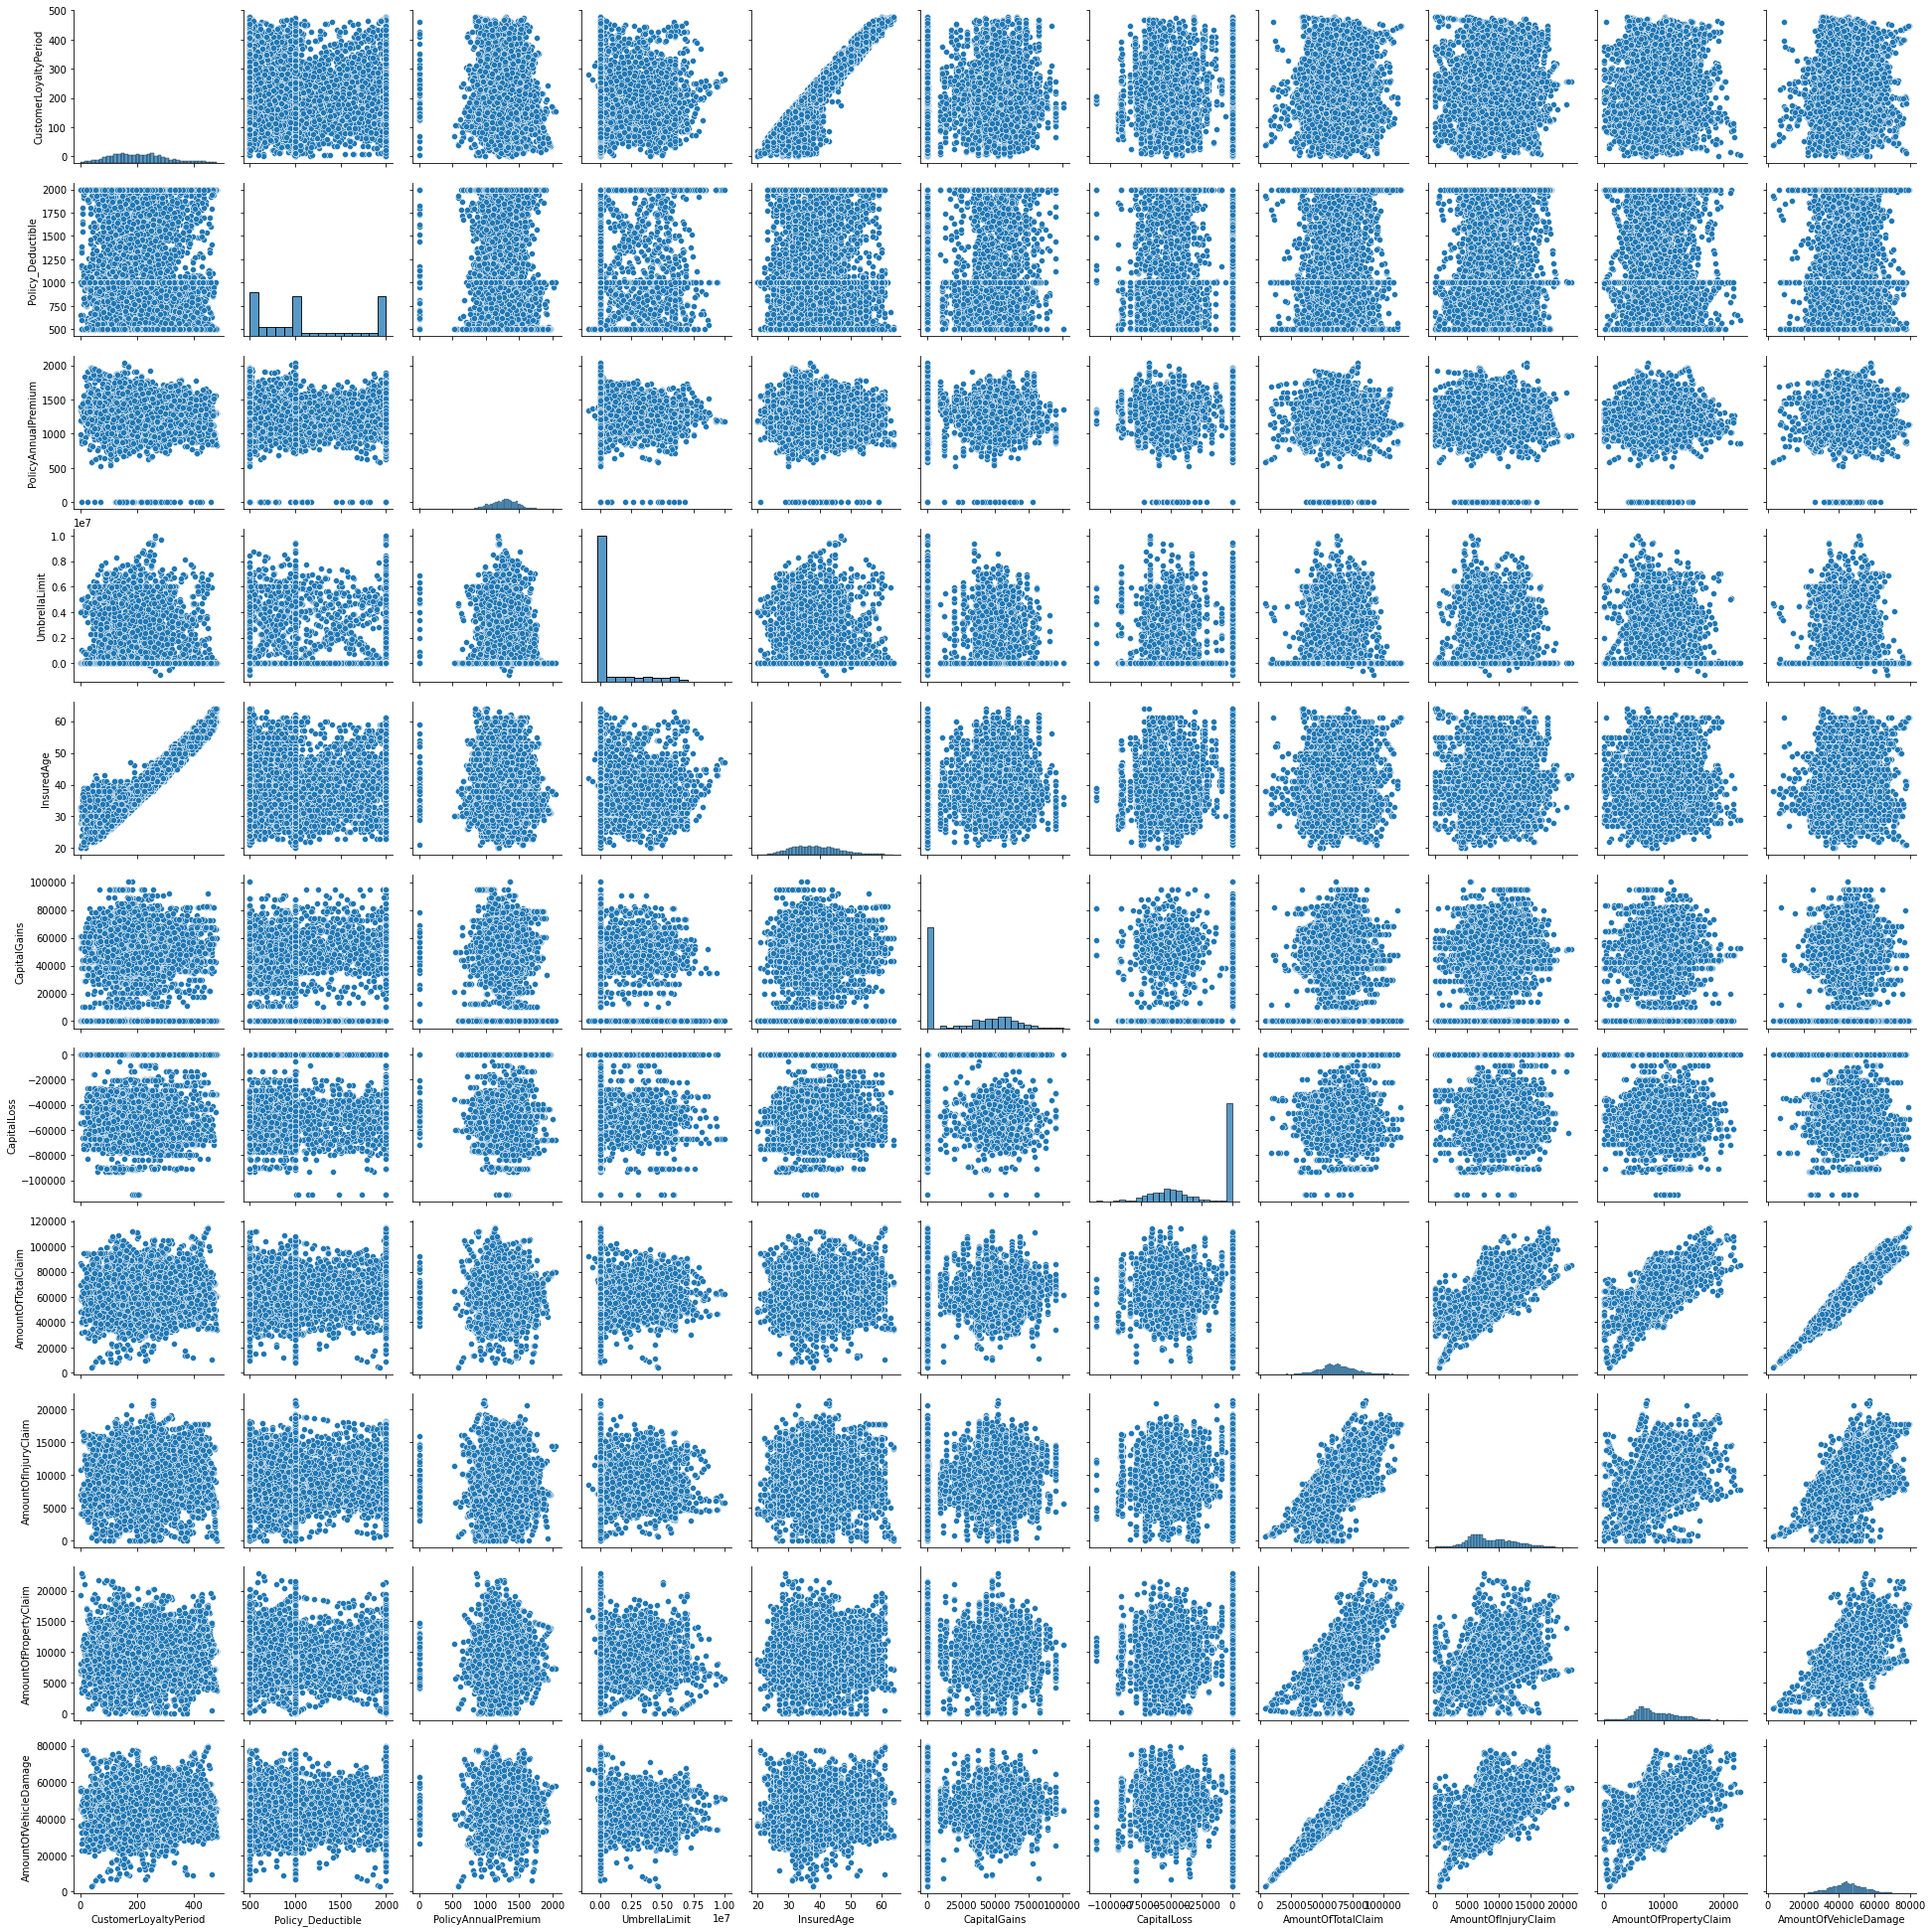

In [ ]:
sns.pairplot(dataset.drop(['VehicleID','InsurancePolicyNumber','InsuredZipCode'],axis=1))

**Pair Plot**

1.The features Customer Loyalty period and Insured Age are highly correlated

2.The features Amount Of total claim,Amount of injury claim,Amount of property claim and Amount of vehicle damage are correlated.

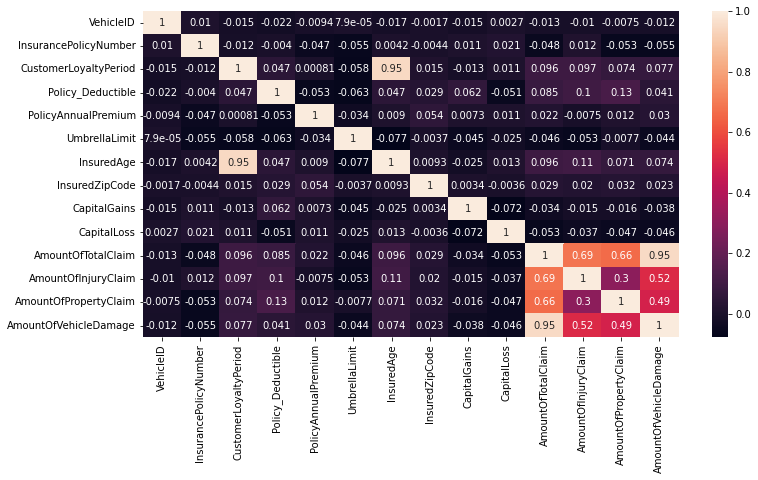

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.heatmap(dataset.corr(),annot=True)
plt.show()

**Plot1:Correlation Map to find the strength of correlation between features**

1.Insured Age and Customer Loyalty Period are highly correlated

2.The total claim amount,Injury claim,property claim and Vehicle damage claims are all correlated.

([<matplotlib.patches.Wedge at 0x7f263a81bcd0>,
 [Text(-0.7030053634744902, 0.8460398684022523, 'Vehicle Claim'),
  Text(0.27245948716148244, -1.0657231478464293, 'Property Claim'),
  Text(0.9938044308828546, -0.47154294943048997, 'Injury Claim')],
 [Text(-0.3834574709860855, 0.4614762918557739, '72.069'),
  Text(0.14861426572444494, -0.5813035351889614, '13.829'),
  Text(0.5420751441179207, -0.2572052451439036, '14.102')])

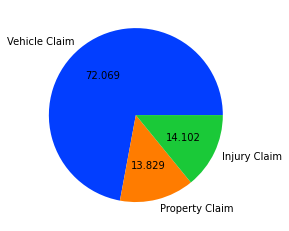

In [ ]:
vehicle_claim=sum(dataset['AmountOfVehicleDamage'].dropna())
property_claim=sum(dataset['AmountOfPropertyClaim'].dropna())
injury_claim=sum(dataset['AmountOfInjuryClaim'].dropna())

values=[vehicle_claim,property_claim,injury_claim]
labels=['Vehicle Claim','Property Claim','Injury Claim']

palette_color = sns.color_palette('bright')
plt.pie(x=values, labels=labels, colors=palette_color,autopct="%.3f")
#majority of claims are in vehicle claim

**Plot2:Total Claim Distribution**

Division of Total claim amount paid by Insurance company into Vehicle,Property and Injury claims.

Amount claimed for Vehicle is 72.069% of the total claimed amount

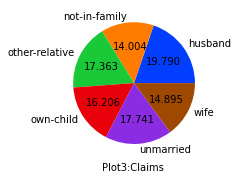

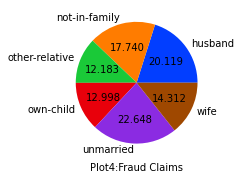

In [ ]:
relation=dataset.InsuredRelationship.unique().to_list()
values=[]
for i in relation:
  values.append(np.count_nonzero(dataset['AmountOfTotalClaim'][dataset['InsuredRelationship']==i]))

values=values
labels=['husband','not-in-family','other-relative','own-child','unmarried','wife']
palette_color = sns.color_palette('bright')
plt.subplot(1,2,1)
plt.pie(x=values, labels=labels, colors=palette_color,autopct='%.3f')
plt.xlabel('Plot3:Claims \n')
plt.show()

fraud=dataset[['AmountOfTotalClaim','InsuredRelationship']][dataset['ReportedFraud']=='Y']
values_fraud=[]
for i in relation:
  values_fraud.append(np.count_nonzero(fraud['AmountOfTotalClaim'][fraud['InsuredRelationship']==i]))

values=values_fraud
labels=['husband','not-in-family','other-relative','own-child','unmarried','wife']

palette_color = sns.color_palette('bright')
plt.subplot(1,2,2)
plt.pie(x=values, labels=labels, colors=palette_color,autopct='%.3f')
plt.xlabel('Plot4:Fraud Claims')
plt.show()

**Plot3 & 4:Frequency distribution of Total Claim Amount w.r.t Insured Relationship**

Above plot shows that majority of the claims were in the name of not-in-family and other-relative both in case of total claims and fraud claims.

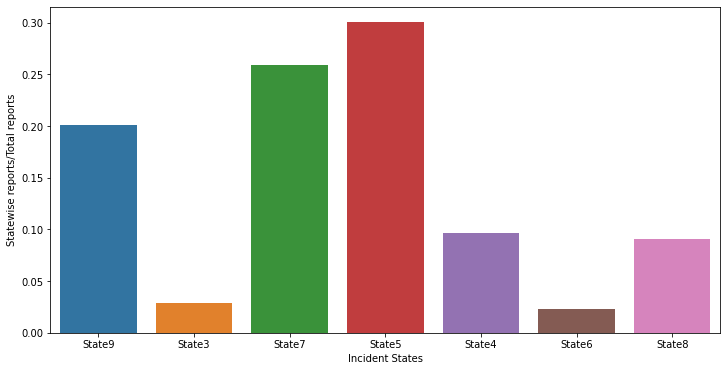

Plot5:Statewise ratio of claims



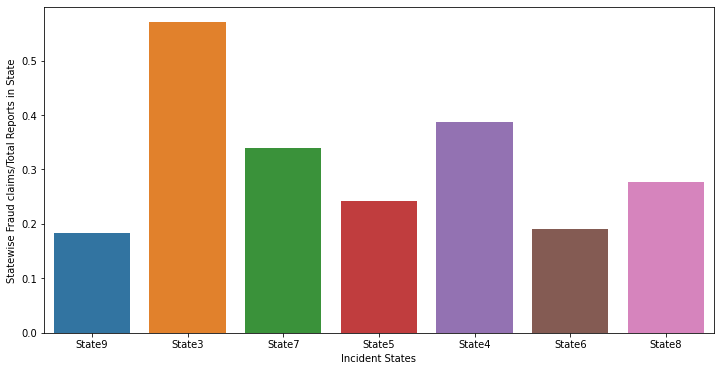

Plot6:Statewise ratio of Fraudulent claims


In [ ]:
states=dataset.IncidentState.unique().to_list()
#to calculate statewise claim ratio
values=[]
for i in range(len(states)):
  values.append((np.count_nonzero(dataset['ReportedFraud'][dataset['IncidentState']==states[i]]))/(dataset.shape[0]))

plt.figure(figsize=(12,6))
ax=sns.barplot(x=states,y=values)
plt.xlabel('Incident States')
plt.ylabel('Statewise reports/Total reports')
plt.show()
print("Plot5:Statewise ratio of claims\n")
#to calculate fraudulent claim ratio statewise#multivariate
values_ratio=[]
for i in states:
  values_ratio.append(np.count_nonzero(dataset['ReportedFraud'][dataset['IncidentState']==i]=='Y')/(np.count_nonzero(dataset['ReportedFraud'][dataset['IncidentState']==i])))

plt.figure(figsize=(12,6))
ax=sns.barplot(x=states,y=values_ratio)
plt.xlabel('Incident States')
plt.ylabel('Statewise Fraud claims/Total Reports in State')
plt.show()
print('Plot6:Statewise ratio of Fraudulent claims')

**Plot5:Incident statewise representation of Frauds**

State 5 followed by State 7 have the highest ratio of reports among the total reports.

**Plot6:Incident statewise fraud claim reports**

State3 followed by state 4 have the highest ratio of fraud claim reports to the total reports within the state


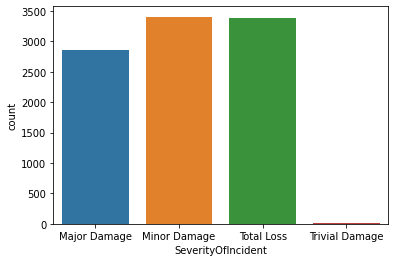

Plot7:Count of different Severity of Incidents under total claims

 The Amount of Claim under each the incidents
Total Claim Amount under Major Damage: 209525973.0
Total Claim Amount under Minor Damage: 181703375.0
Total Claim Amount under Trivial Damage: 550329.0
Total Claim Amount under Total Loss: 212459599.0




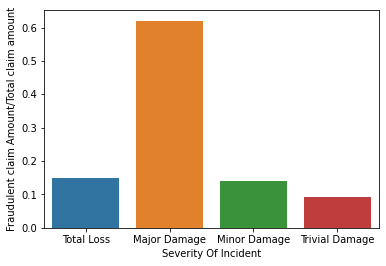

Plot8:Severity wise Fraudulent claim Amount/Total claim amount


In [ ]:
#bivariate
claim=dataset[['SeverityOfIncident','AmountOfTotalClaim']]
damages=claim['SeverityOfIncident'].unique().to_list()
sns.countplot(x='SeverityOfIncident',data=claim)
plt.show()
print("Plot7:Count of different Severity of Incidents under total claims")

values=[]
for i in damages:
  values.append(np.sum(claim['AmountOfTotalClaim'][claim['SeverityOfIncident']==i]))

print("\n The Amount of Claim under each the incidents")
print("Total Claim Amount under Major Damage:",values[0])
print("Total Claim Amount under Minor Damage:",values[1])
print("Total Claim Amount under Trivial Damage:",values[3])
print("Total Claim Amount under Total Loss:",values[2])
print("\n")

#multivariate
fraud=dataset[['SeverityOfIncident','AmountOfTotalClaim']][dataset['ReportedFraud']=='Y']
values=[]
for i in damages:
  values.append((sum(fraud['AmountOfTotalClaim'][fraud['SeverityOfIncident']==i]))/(np.sum(claim['AmountOfTotalClaim'][claim['SeverityOfIncident']==i])))

sns.barplot(x=damages,y=values)
plt.xlabel('Severity Of Incident')
plt.ylabel('Fraudulent claim Amount/Total claim amount')
plt.show()
print("Plot8:Severity wise Fraudulent claim Amount/Total claim amount")



**Plot7:Visualisation of number of claims according to the Severity Of the Incident**

1.Number of claims under Minor and Major damage are the highest.

2.Amount claimed under Total Loss followed by Major damage are the highest.

**Plot8:Severity wise Fraudulent claim Amount/Total claim amount**

Frauds under the Major Damage are the highest.

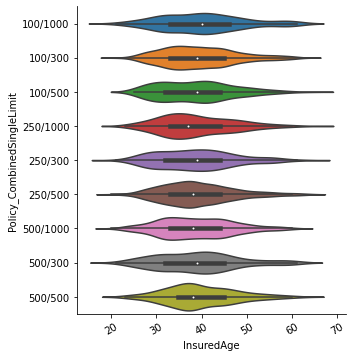

In [ ]:
#bivariate
limit=dataset[['Policy_CombinedSingleLimit','InsuredAge']]

policy=limit['Policy_CombinedSingleLimit'].unique().to_list()

sns.catplot(y='Policy_CombinedSingleLimit',kind='violin',x='InsuredAge',data=limit)
plt.xticks(rotation=30)
plt.show()

**Plot9:Type of Policy and the respective Age group of Insured people**

1.The horizontal lines represent the Type of Policy owned by the age group of Customers

2.The thickness of the violin plots resemble the density of Insured people in the age group.

**Reason**

To identify the type of policies owned by different age group of people



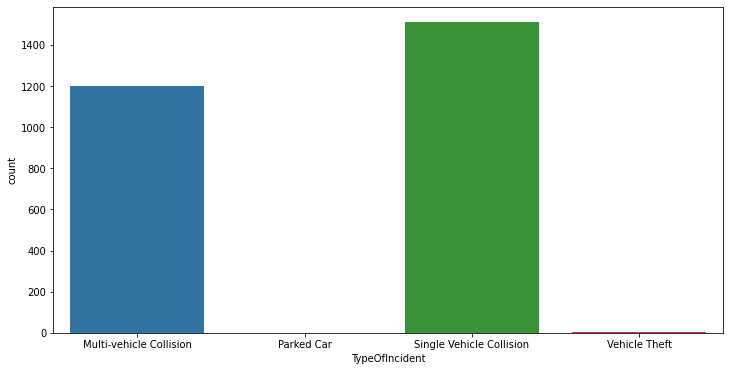

The Amount of total fraud claim in Single Vehicle Collision 98881243.0
The Amount of total fraud claim in Multi-vehicle Collision 74569402.0
The Amount of total fraud claim in Vehicle Theft 39736.0
The Amount of total fraud claim in Parked Car 53044.0


In [ ]:
#multi
#types of incident plots:
fraud=dataset[['TypeOfIncident','AmountOfTotalClaim']][dataset['ReportedFraud']=='Y']

plt.figure(figsize=(12,6))
sns.countplot(x='TypeOfIncident',data=fraud)
plt.show()

incident=fraud['TypeOfIncident'].unique().to_list()
for i in incident:
  print("The Amount of total fraud claim in",i,sum(fraud['AmountOfTotalClaim'][fraud['TypeOfIncident']==i]))

**Plot10:Peek into the Claims as per the Type Of Incident**

1.The plot shows that:count(Single Vehicle Collission claims) >> count(Multi Vehicle Collission claims) 

2.The total amount under (Single Vehicle Collission claims) >> (Multi Vehicle Collission claims)

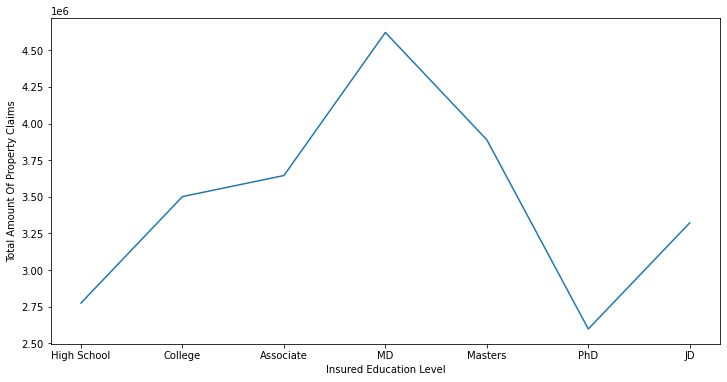

In [ ]:
#multi
fraud=dataset[['InsuredEducationLevel','AmountOfPropertyClaim','PropertyDamage']][dataset['ReportedFraud']=='Y']
fraud=fraud[['InsuredEducationLevel','AmountOfPropertyClaim']]

degree=fraud['InsuredEducationLevel'].unique().to_list()
values=[]
for i in degree:
  values.append(sum(fraud['AmountOfPropertyClaim'][fraud['InsuredEducationLevel']==i]))

plt.figure(figsize=(12,6))
ax=sns.lineplot(x=degree,y=values)
plt.xlabel('Insured Education Level')
plt.ylabel('Total Amount Of Property Claims')
plt.show()

**Plot11:Insured Education level vs The amount of Fake Property claims**

Customers with MD and Masters degree have claimed most amount in fraud Property claims

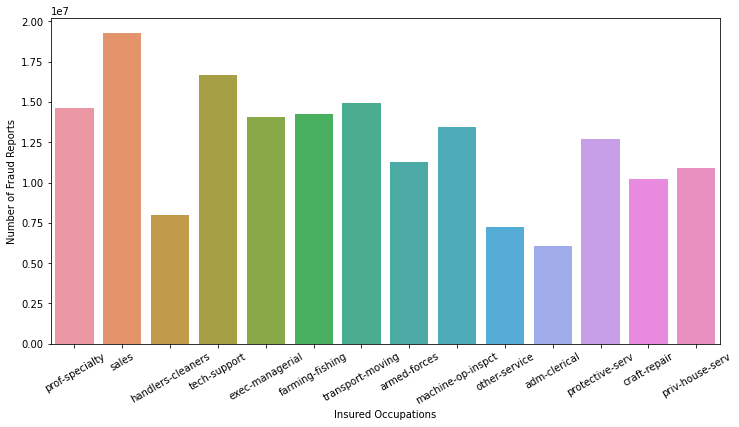

                                              Plot8



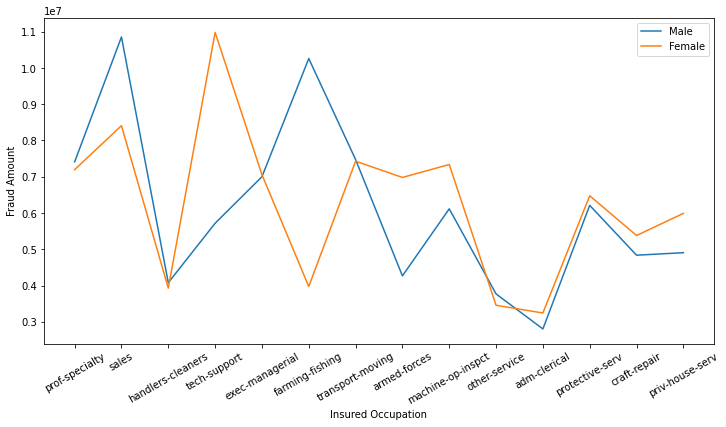

                                              Plot9

The Sum of Fraud claim amount by Male: 85706801.0
The Sum of Fraud claim amount by Female: 87836624.0


In [ ]:
#multi
fraud=dataset[['AmountOfTotalClaim','InsuredOccupation','InsuredGender']][dataset['ReportedFraud']=='Y']

roles=fraud['InsuredOccupation'].unique().to_list()
men=fraud[['AmountOfTotalClaim','InsuredOccupation']][fraud['InsuredGender']=='MALE']
women=fraud[['AmountOfTotalClaim','InsuredOccupation']][fraud['InsuredGender']=='FEMALE']
values=[]
male_values=[]
female_values=[]
for i in roles:
  values.append(np.sum(fraud['AmountOfTotalClaim'][fraud['InsuredOccupation']==i]))
  male_values.append(np.sum(men['AmountOfTotalClaim'][men['InsuredOccupation']==i]))
  female_values.append(np.sum(women['AmountOfTotalClaim'][women['InsuredOccupation']==i]))

plt.figure(figsize=(12,6))
ax=sns.barplot(x=roles,y=values)
plt.xticks(rotation=30)
plt.xlabel('Insured Occupations')
plt.ylabel('Number of Fraud Reports')
plt.show()
print('                                              Plot8\n')


plt.figure(figsize=(12,6))
line1,=plt.plot(roles,male_values)
line2,=plt.plot(roles,female_values)
plt.xlabel('Insured Occupation')
plt.ylabel('Fraud Amount')
plt.legend([line1,line2],['Male','Female'])


plt.xticks(rotation=30)
plt.show()
print('                                              Plot9\n')
male=np.sum(fraud['AmountOfTotalClaim'][fraud['InsuredGender']=='MALE'])
female=np.sum(fraud['AmountOfTotalClaim'][fraud['InsuredGender']=='FEMALE'])
print("The Sum of Fraud claim amount by Male:",male)
print("The Sum of Fraud claim amount by Female:",female)

**Plot12:Fraud Reports vs Insured Occupations**

Those working under Sales and Tech-support have the highest fraud reports.

**Plot13:Sum Of Fraud Amount vs Insured Occupations vs Insured Gender**

Sum of fraud amounts claimed by female customers is more than that claimed by men.


In [ ]:
pd.crosstab(dataset['Policy_CombinedSingleLimit'],dataset['InsuredRelationship'],values=dataset['PolicyAnnualPremium'],aggfunc=np.sum)

InsuredRelationship,husband,not-in-family,other-relative,own-child,unmarried,wife
Policy_CombinedSingleLimit,,,,,,
100/1000,64447.38,73577.27,61063.80,46885.85,52849.61,54783.90
100/300,597007.11,633823.62,585902.12,584522.79,495807.62,636465.18
100/500,73224.52,75250.87,98606.61,62746.55,58669.39,58212.88
250/1000,51492.86,74502.06,75000.67,69740.89,46802.23,66592.06
250/300,85600.67,81560.32,85495.93,55405.72,75729.11,48507.91
250/500,710615.02,788841.30,581669.38,514873.91,501289.39,419349.91
500/1000,525972.18,535950.42,487493.20,556453.59,379954.63,391030.89
500/300,67416.78,66428.14,92878.86,64637.50,62255.32,54338.89
500/500,46337.62,86766.87,72219.86,57145.72,53151.20,57854.63


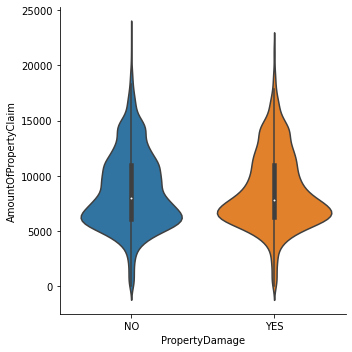

47.3002683734676
52.6997316265324


In [ ]:
sns.catplot(x='PropertyDamage',y='AmountOfPropertyClaim',kind='violin',data=dataset)
plt.show()
print(sum(dataset['AmountOfPropertyClaim'][dataset['PropertyDamage']=='YES'])/sum(dataset['AmountOfPropertyClaim'])*100)
print(sum(dataset['AmountOfPropertyClaim'][dataset['PropertyDamage']=='NO'])/sum(dataset['AmountOfPropertyClaim'])*100)

**Plot14:Property Damage Claims**

The maximum amount for property damage claims is claimed by the customers that have reported no damage to property that is 47.3% of claim amount under property.

#Data Cleaning

#Missing Value Treatment

In [61]:
#dropping the columns which are not required for the processing ahead.
df=data.drop(['CustomerID','ReportedFraud','DateOfPolicyCoverage','DateOfIncident'],axis=1)
df_test=data_test.drop(['CustomerID','DateOfPolicyCoverage','DateOfIncident'],axis=1)

In [62]:
cat_cols=df.select_dtypes(include='category').columns
num_cols=df.select_dtypes(include=['int','float']).columns

cat_cols_test=df_test.select_dtypes(include='category').columns
num_cols_test=df_test.select_dtypes(include=['int','float']).columns

Reading the categorical and numerical column names to use for respective imputations.

**To obtain the %age of missing values in each column of both Train and Test datasets**

In [63]:
#to calculate % of missing values:
print("Percentage of Missing Values in %")
for x in df.columns:
  y=((df[x].isna().sum()/df[x].shape[0])*100)
  print(x,":",y)

Percentage of Missing Values in %
VehicleModel : 0.0
VehicleMake : 0.17339436815092246
VehicleYOM : 0.0
VehicleID : 0.0
InsurancePolicyNumber : 0.0
CustomerLoyaltyPeriod : 0.0
InsurancePolicyState : 0.0
Policy_CombinedSingleLimit : 0.0
Policy_Deductible : 0.0
PolicyAnnualPremium : 0.0
UmbrellaLimit : 0.0
InsuredRelationship : 0.0
InsuredAge : 0.0
InsuredZipCode : 0.0
InsuredGender : 0.10403662089055349
InsuredEducationLevel : 0.0
InsuredOccupation : 0.0
InsuredHobbies : 0.0
CapitalGains : 0.0
CapitalLoss : 0.0
Country : 0.006935774726036899
TypeOfIncident : 0.0
TypeOfCollission : 17.901234567901234
SeverityOfIncident : 0.0
AuthoritiesContacted : 0.0
IncidentState : 0.0
IncidentCity : 0.0
IncidentAddress : 0.0
IncidentTime : 0.10750450825357193
NumberOfVehicles : 0.0
PropertyDamage : 36.27063392980996
BodilyInjuries : 0.0
Witnesses : 0.15952281869884866
PoliceReport : 34.00263559439589
AmountOfTotalClaim : 0.17339436815092246
AmountOfInjuryClaim : 0.0
AmountOfPropertyClaim : 0.0
AmountO

In [64]:
#to calculate % of missing values in test:
print("Percentage of Missing Values in test %")
for x in df_test.columns:
  y=((df_test[x].isna().sum()/df_test[x].shape[0])*100)
  print(x,":",y)

Percentage of Missing Values in test %
VehicleModel : 0.0
VehicleMake : 0.08976660682226212
VehicleYOM : 0.0
VehicleID : 0.0
InsurancePolicyNumber : 0.0
CustomerLoyaltyPeriod : 0.0
InsurancePolicyState : 0.0
Policy_CombinedSingleLimit : 0.0
Policy_Deductible : 0.0
PolicyAnnualPremium : 0.0
UmbrellaLimit : 0.0
InsuredRelationship : 0.0
InsuredAge : 0.0
InsuredZipCode : 0.0
InsuredGender : 0.08976660682226212
InsuredEducationLevel : 0.0
InsuredOccupation : 0.0
InsuredHobbies : 0.0
CapitalGains : 0.0
CapitalLoss : 0.0
Country : 0.04488330341113106
TypeOfIncident : 0.0
TypeOfCollission : 19.782315978456015
SeverityOfIncident : 0.0
AuthoritiesContacted : 0.0
IncidentState : 0.0
IncidentCity : 0.0
IncidentAddress : 0.0
IncidentTime : 0.07854578096947935
NumberOfVehicles : 0.0
PropertyDamage : 35.89542190305207
BodilyInjuries : 0.0
Witnesses : 0.13464991023339318
PoliceReport : 33.819569120287255
AmountOfTotalClaim : 0.08976660682226212
AmountOfInjuryClaim : 0.0
AmountOfPropertyClaim : 0.0
Am

Iterative Imputer is highly accurate in estimating the missing values compared to other imputers.Features with higher number of missing values will be imputed by Iterative Imputer.

Witnesses,Incident Time,Type Of Collission,Insured gender,\Country and Vehicle Make we can impute the missing values wth the help of Simple Imputer

In [65]:
si_cat=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df[['Witnesses','IncidentTime','InsuredGender','Country','VehicleMake']]=si_cat.fit_transform(df[['Witnesses','IncidentTime','InsuredGender','Country','VehicleMake']])
df_test[['Witnesses','IncidentTime','InsuredGender','Country','VehicleMake']]=si_cat.transform(df_test[['Witnesses','IncidentTime','InsuredGender','Country','VehicleMake']])

In [66]:
cat_le=['VehicleModel', 'VehicleMake', 'VehicleYOM', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'Country', 'TypeOfIncident','SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'BodilyInjuries', 'Witnesses','InsuredZipCode']
cat_le_test=['VehicleModel', 'VehicleMake', 'VehicleYOM', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'Country', 'TypeOfIncident','SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'BodilyInjuries', 'Witnesses','InsuredZipCode']

Encoding categorical features using LabelEncoder(),as Iterative Imputer expects numerical values as input.

In [67]:
le=LabelEncoder()
df_le=pd.DataFrame()
df_le=df.drop(['PoliceReport','PropertyDamage','TypeOfCollission'],axis=1)
#Encoding labels to categorical data.
for x in cat_le:
  df_le[x]=le.fit_transform(df_le[x])

#Encoding and Mapping the labels to the features with missing values separately and merging them with dataset.
PoliceReport=le.fit(df['PoliceReport'].dropna())
PoliceReport_map = dict(zip(le.classes_, range(len(le.classes_)))) 
df_le['PoliceReport'] = df['PoliceReport'].map(PoliceReport_map)
df_le['PoliceReport'] = df_le['PoliceReport'].astype('category')

PropertyDamage=le.fit(df['PropertyDamage'].dropna())
PropertyDamage_map = dict(zip(le.classes_, range(len(le.classes_)))) 
df_le['PropertyDamage'] = df['PropertyDamage'].map(PropertyDamage_map)
df_le['PropertyDamage'] = df_le['PropertyDamage'].astype('category')

TypeOfCollission=le.fit(df['TypeOfCollission'].dropna())
TypeOfCollission_map = dict(zip(le.classes_, range(len(le.classes_)))) 
df_le['TypeOfCollission'] = df['TypeOfCollission'].map(TypeOfCollission_map)
df_le['TypeOfCollission'] = df_le['TypeOfCollission'].astype('category')

#Applying imputer to the dataset.
imp = IterativeImputer()
imp_cols = df_le.columns
df_le=pd.DataFrame(imp.fit_transform(df_le),columns=imp_cols)

In [68]:
#Repeating same procedure for Test data.
le=LabelEncoder()
df_le_test=pd.DataFrame()
df_le_test=df_test.drop(['PoliceReport','PropertyDamage','TypeOfCollission'],axis=1)

for x in cat_le_test:
  df_le_test[x]=le.fit_transform(df_le_test[x])
 
df_le_test['PoliceReport'] = df_test['PoliceReport'].map(PoliceReport_map)
df_le_test['PoliceReport'] = df_le_test['PoliceReport'].astype('category')

df_le_test['PropertyDamage'] = df_test['PropertyDamage'].map(PropertyDamage_map)
df_le_test['PropertyDamage'] = df_le_test['PropertyDamage'].astype('category')
 
df_le_test['TypeOfCollission'] = df_test['TypeOfCollission'].map(TypeOfCollission_map)
df_le_test['TypeOfCollission'] = df_le_test['TypeOfCollission'].astype('category')

imp_cols_test = df_le_test.columns
df_le_test=pd.DataFrame(imp.transform(df_le_test),columns=imp_cols_test)

Taking the imputed features and merging them with the dataset without labels.

In [69]:
df_le[['TypeOfCollission','PoliceReport','PropertyDamage']]=np.round(df_le[['TypeOfCollission','PoliceReport','PropertyDamage']])
df_le_test[['TypeOfCollission','PoliceReport','PropertyDamage']]=np.round(df_le_test[['TypeOfCollission','PoliceReport','PropertyDamage']])

df['PoliceReport']=df_le['PoliceReport'].astype('category')
df['TypeOfCollission']=df_le['TypeOfCollission'].astype('category')
df['PropertyDamage']=df_le['PropertyDamage'].astype('category')
df['AmountOfTotalClaim']=df_le['AmountOfTotalClaim']

df_test['PoliceReport']=df_le_test['PoliceReport'].astype('category')
df_test['TypeOfCollission']=df_le_test['TypeOfCollission'].astype('category')
df_test['PropertyDamage']=df_le_test['PropertyDamage'].astype('category')
df_test['AmountOfTotalClaim']=df_le_test['AmountOfTotalClaim']

In [70]:
df.dtypes

VehicleModel                  category
VehicleMake                     object
VehicleYOM                    category
VehicleID                        int64
InsurancePolicyNumber            int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium            float64
UmbrellaLimit                    int64
InsuredRelationship           category
InsuredAge                       int64
InsuredZipCode                   int64
InsuredGender                   object
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                     int64
CapitalLoss                      int64
Country                         object
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState            

In [71]:
df_test.dtypes

VehicleModel                  category
VehicleMake                     object
VehicleYOM                    category
VehicleID                        int64
InsurancePolicyNumber            int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium            float64
UmbrellaLimit                    int64
InsuredRelationship           category
InsuredAge                       int64
InsuredZipCode                   int64
InsuredGender                   object
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                     int64
CapitalLoss                      int64
Country                         object
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState            

Some columns have been missing their dtype,so reassigning the type to those columns.

In [72]:
df[['VehicleMake','Witnesses','Country','InsuredGender','IncidentTime',
    'InsuredZipCode']]=df[['VehicleMake','Witnesses','Country','InsuredGender','IncidentTime','InsuredZipCode']].astype('category')
df_test[['VehicleMake','Witnesses','Country','InsuredGender','IncidentTime',
         'InsuredZipCode']]=df_test[['VehicleMake','Witnesses','Country','InsuredGender','IncidentTime','InsuredZipCode']].astype('category')

#Outlier Detection and Treatment

In [73]:
box=df[num_cols]
box.describe()

,VehicleID,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,CapitalGains,CapitalLoss,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000
mean,20651.174261,129312.517097,203.067867,1114.282529,1255.528382,9.836680e+05,38.815370,23066.569566,-24940.612429,52308.118012,7337.118428,7283.870197,37687.129387
std,11114.833360,11114.060267,99.932951,546.632816,223.013899,1.969282e+06,7.996377,27637.813724,27913.209608,25101.479144,4427.638593,4375.842738,17977.048232
min,1401.000000,110122.000000,1.000000,500.000000,-1.000000,-1.000000e+06,19.000000,0.000000,-111100.000000,150.000000,0.000000,0.000000,109.000000
25%,11035.750000,119698.750000,126.000000,622.000000,1122.007500,0.000000e+00,33.000000,0.000000,-50000.000000,44652.000000,4743.750000,4862.000000,32193.250000
50%,20623.000000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00,38.000000,0.000000,0.000000,58359.500000,7147.000000,7051.000000,42457.500000
75%,30275.250000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,44.000000,49000.000000,0.000000,68977.000000,10571.250000,10327.000000,49535.750000
max,39898.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,64.000000,100500.000000,0.000000,114920.000000,21450.000000,23670.000000,79560.000000


We can see that PolicyAnnualPremium and Umbrella Limit which are expected to be +ve values, have minimum in -ve which are definitely outliers.

We will be replacing them with the median.
For the Umbrella Limit its better to inverse the sign maybe.

Rest all columns appear pretty normal for now so wont change anything

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


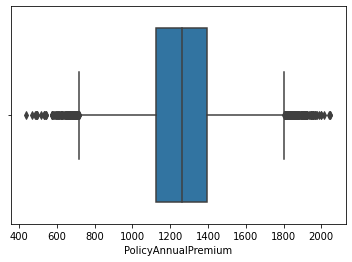

In [74]:
policy_premium=df['PolicyAnnualPremium'].to_list()
for x in range(len(policy_premium)):
  if(policy_premium[x]<0):
    policy_premium[x]=median(policy_premium)

df['PolicyAnnualPremium']=policy_premium

sns.boxplot(df['PolicyAnnualPremium'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


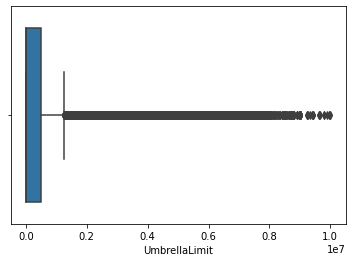

In [75]:
#the figure shows Umbrella limit has some outlier(-ve values):from industrial view -ve umbrella limit is invalid.so lets multiply them with -1,to make them positive
umbrella_limit=df['UmbrellaLimit'].to_list()
for x in range(len(umbrella_limit)):
  if(umbrella_limit[x]<0):
    umbrella_limit[x]=umbrella_limit[x]*(-1)

df['UmbrellaLimit']=umbrella_limit

sns.boxplot(df['UmbrellaLimit'])

#Feature Engineering

**Delta Days**

The difference in number of days between the Date Of Policy Coverage and the Date of the incident is calculated and stored as Delta Days.The difference in days is the time taken by the customer to report and claim the money from company which i believe might be useful.

In [76]:
delta,z=[],[]
for x in range(len(date)):
  y=(date[x]-new_dop[x])
  delta.append(y)

DifferenceOfDays=pd.Series(delta)
for x in range(len(DifferenceOfDays)):
  y=(str(DifferenceOfDays[x]).split(" "))
  z.append(y[0])
#######################################
delta_test,z_test=[],[]
for x in range(len(date_test)):
  y=(date_test[x]-new_dop_test[x])
  delta_test.append(y)

DifferenceOfDays_test=pd.Series(delta_test)
for x in range(len(DifferenceOfDays_test)):
  y=(str(DifferenceOfDays_test[x]).split(" "))
  z_test.append(y[0])
############################################################
df['DeltaDays']=z
df_test['DeltaDays']=z_test
df['DeltaDays']=df['DeltaDays'].astype('int')
df_test['DeltaDays']=df_test['DeltaDays'].astype('int')

#Feature Transformation

**Numerical To Categorical:Binning**

Can reduce the impact of measurement errors and improves the model performance.


1.Umbrella_Limit:There are some datapoints with 0 limit and some very high.As its value is of not much use but the presence or absence of the limit might help us.

2.InsuredAge:

20-35:Young

36-50:Senior

50+:Old

In [77]:
umbrella=np.round(df['UmbrellaLimit'].to_list())
new_limit=[]
for i in range(len(umbrella)):
  if(umbrella[i]==0):
    new_limit.append('Absent')
  else:
    new_limit.append('Present')

df['UmbrellaLimit']=new_limit
df['UmbrellaLimit']=df['UmbrellaLimit'].astype('category')

umbrella_test=np.round(df_test['UmbrellaLimit'].to_list())
new_limit_test=[]
for i in range(len(umbrella_test)):
  if(umbrella_test[i]==0):
    new_limit_test.append('Absent')
  else:
    new_limit_test.append('Present')

df_test['UmbrellaLimit']=new_limit_test
df_test['UmbrellaLimit']=df_test['UmbrellaLimit'].astype('category')

In [78]:
age=df['InsuredAge'].to_list()
new_age=[]
for i in range(len(age)):
  if(age[i]<=35):
    new_age.append('Young')
  elif(35<age[i]<=50):
    new_age.append('Senior')
  else:
    new_age.append('Old')

df['InsuredAge']=new_age
df['InsuredAge']=df['InsuredAge'].astype('category')

age_test=df_test['InsuredAge'].to_list()
new_age_test=[]
for i in range(len(age_test)):
  if(age_test[i]<=35):
    new_age_test.append('Young')
  elif(35<age_test[i]<=50):
    new_age_test.append('Senior')
  else:
    new_age_test.append('Old')

df_test['InsuredAge']=new_age_test
df_test['InsuredAge']=df_test['InsuredAge'].astype('category')

In [80]:
df.dtypes

VehicleModel                  category
VehicleMake                   category
VehicleYOM                    category
VehicleID                        int64
InsurancePolicyNumber            int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium            float64
UmbrellaLimit                 category
InsuredRelationship           category
InsuredAge                    category
InsuredZipCode                category
InsuredGender                 category
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                     int64
CapitalLoss                      int64
Country                       category
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState            

In [81]:
cat_cols=df.select_dtypes(include='category').columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols_test=num_cols
cat_cols_test=cat_cols

**Categorical To Numerical**

1.Response Encoding:Used to convert categorical features with more unique values into numerical values.Where each unique data in a feature is assigned its respective F- test score.Done to retain data importance and to save computation time as it reduces the number of columns as well.

2.One Hot Encoding:To convert categorical features into 0's and 1's.

**Reponse Encoding**

In [ ]:
# 1.Response Encoding
#Response Encoding:To handle columns with more number of unique categorical values:helps to reduce column count
#find the related scores of each incident location with target..then map them to their places in dataframe
def response_encoding(data,data_test,target):
  bin_data=pd.get_dummies(data=data,prefix_sep="_")
  fraud=pd.get_dummies(data=target,drop_first=True,prefix_sep="_").astype('category')
  features = array(bin_data.columns)
  model=SelectKBest(f_classif,k='all')
  model.fit_transform(X=bin_data,y=fraud)
  filter=model.get_support()
  scores=model.scores_
  bin_map=dict(zip(features,scores))
  data=data.map(bin_map).astype('float')
  data_test=data_test.map(bin_map).astype('float')
  return data,data_test

cols=['VehicleModel','Policy_CombinedSingleLimit','InsuredOccupation','InsuredHobbies','InsuredEducationLevel',
      'IncidentCity','IncidentAddress','VehicleMake','VehicleYOM','IncidentTime','InsuredRelationship','InsuredZipCode','InsurancePolicyState']
for x in cols:
  df[x],df_test[x]=response_encoding(df[x],df_test[x],data['ReportedFraud'])

**One Hot Encoding**

In [100]:
cat_cols=df.select_dtypes(include='category').columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols_test=num_cols
cat_cols_test=cat_cols

In [99]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
df_dum=pd.DataFrame(data=ohe.fit_transform(df[cat_cols]),columns=ohe.get_feature_names_out())
df_dum_test=pd.DataFrame(data=ohe.fit_transform(df_test[cat_cols_test]),columns=ohe.get_feature_names_out())

#Feature Scaling

**Robust Scaler()**

Not sensitive to outliers as it uses IQR to scale the data.

In [101]:
rs=RobustScaler()
df[num_cols]=rs.fit_transform(df[num_cols])
df_test[num_cols_test]=rs.transform(df_test[num_cols_test])

#Feature Selection and Elimination

To eliminate the features of less importance that helps to avoid overfitting as well as to save computation time and resources.

In [102]:
fs_x=pd.DataFrame()
fs_x=pd.concat((df[num_cols],df_dum),axis=1)
fs_y=pd.get_dummies(data=data['ReportedFraud'],drop_first=True,prefix_sep="_").astype('category')

fs_x_test=pd.DataFrame()
fs_x_test=pd.concat((df_test[num_cols],df_dum_test),axis=1)

In [106]:
#Feature Selection#coz using chi2 in presence of negative values was not possible
model=SelectKBest(f_classif,k='all')
model.fit_transform(X=fs_x,y=fs_y)
filter = model.get_support()
features = array(fs_x.columns)
scores=model.scores_
new_score=[]
feature_select=[]
for i in range(len(scores)):
  if(scores[i]>10):
    new_score.append(scores[i])
    feature_select.append(features[i])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


**Relevance score of 10 is kept as threshold to select features hence able to eliminate low relevant features**

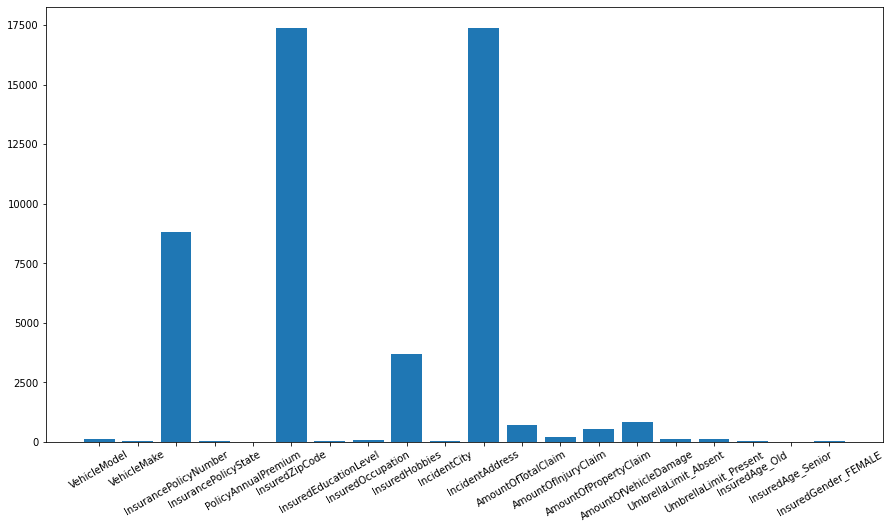

In [108]:
plt.figure(figsize=(15,8))
top_features=feature_select[0:20]
top_scores=new_score[0:20]
plt.bar(x=top_features,height=top_scores)
plt.xticks(rotation=30)
plt.show()

In [105]:
dict(zip(features,scores))

{'VehicleModel': 102.92351247762413,
 'VehicleMake': 13.929170430593905,
 'VehicleYOM': 7.222936037943332,
 'VehicleID': 0.48293364648861903,
 'InsurancePolicyNumber': 8822.262373183992,
 'CustomerLoyaltyPeriod': 7.212019809563465,
 'InsurancePolicyState': 33.83598339869257,
 'Policy_CombinedSingleLimit': 6.769153660078729,
 'Policy_Deductible': 1.8702436831271831,
 'PolicyAnnualPremium': 10.87204569413698,
 'InsuredRelationship': 0.6789804961775611,
 'InsuredZipCode': 17396.646286436702,
 'InsuredEducationLevel': 27.88252353757536,
 'InsuredOccupation': 90.36207183317576,
 'InsuredHobbies': 3682.9863985483594,
 'CapitalGains': 0.05423785759426894,
 'CapitalLoss': 5.702703425146956,
 'IncidentCity': 25.061890278566096,
 'IncidentAddress': 17379.825871036326,
 'IncidentTime': 0.47593138649379546,
 'AmountOfTotalClaim': 721.7540127208904,
 'AmountOfInjuryClaim': 184.0303467856476,
 'AmountOfPropertyClaim': 534.5467362630837,
 'AmountOfVehicleDamage': 814.5014933193462,
 'DeltaDays': 1.06

The important features are listed under the name 'feature_select' and stored in train and test.

In [ ]:
train=fs_x[feature_select]
train.drop('InsurancePolicyNumber',axis=1,inplace=True)
test=fs_x_test[feature_select]
test.drop('InsurancePolicyNumber',axis=1,inplace=True)

In [110]:
X=train
y=pd.get_dummies(data=data['ReportedFraud'],drop_first=True,prefix_sep="_").astype('category')

Splitting train data into Train and Validation sets to train and validate the models before applying the test data on it.

In [114]:
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.1,random_state=322)
X_test=test

#Model Building

After a bit of research and recommendations from different sources and work experience i have listed the below classifiers to work on

**Model Selection and Training**

**Logistic Regression**

Computationally low and Simple in execution

In [119]:
st=time.time()
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
y_lr=lr.predict(X_val)
lr_prob=lr.predict_proba(X_val)
et=time.time()
time_lr=et-st
print(classification_report(y_val,y_lr))
print("Total time taken:",time_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2105
           1       0.92      0.78      0.84       779

    accuracy                           0.92      2884
   macro avg       0.92      0.88      0.90      2884
weighted avg       0.92      0.92      0.92      2884

Total time taken: 3.686227560043335


**Decision Tree Classifier**

Simple to interpret and faster than many others.

In [120]:
st=time.time()
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_dtc=dtc.predict(X_val)
dtc_prob=dtc.predict_proba(X_val)
et=time.time()
time_dtc=et-st
print(classification_report(y_val,y_dtc))
print("Total time taken:",time_dtc)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2105
           1       0.77      0.79      0.78       779

    accuracy                           0.88      2884
   macro avg       0.85      0.85      0.85      2884
weighted avg       0.88      0.88      0.88      2884

Total time taken: 1.0556950569152832


**Random Forest Classifier**

Good at learning patterns with large datasets

Does not overfit on the data

In [121]:
st=time.time()
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
y_rfc=model.predict(X_val)
rfc_prob=model.predict_proba(X_val)
et=time.time()
time_rfc=et-st
print(classification_report(y_val,y_rfc))
print("Total time taken:",time_rfc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2105
           1       0.94      0.82      0.88       779

    accuracy                           0.94      2884
   macro avg       0.94      0.90      0.92      2884
weighted avg       0.94      0.94      0.94      2884

Total time taken: 6.066400766372681


**Light Gradient Boosting Classifier**

Can handle large size of data and requires low memory for computation

In [122]:
st=time.time()
lgb=lgbm.LGBMClassifier()
lgb.fit(X_train,y_train)
y_lgb=lgb.predict(X_val)
lgb_prob=lgb.predict_proba(X_val)
et=time.time()
time_lgb=et-st
#max_bin=2000,num_leaves=70,boosting_type='dart',objective='binary',num_iterations=700,n_estimators=6000,random_state=115232,learning_rate=0.09
print(classification_report(y_val,y_lgb))
print("Total time taken:",time_lgb)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2105
           1       0.95      0.82      0.88       779

    accuracy                           0.94      2884
   macro avg       0.94      0.90      0.92      2884
weighted avg       0.94      0.94      0.94      2884

Total time taken: 0.6791081428527832


**Voting Classifier**

Reduces variance as it considers the majority voting from the estimators.

In [ ]:
st=time.time()
estimators_vote = [('knn',KNeighborsClassifier()),('lr',LogisticRegression(max_iter=500)),('dtc',DecisionTreeClassifier()),
               ('nb',GaussianNB()),('lgb',lgbm.LGBMClassifier())]

vote = VotingClassifier(estimators=estimators_vote,voting='hard',verbose=0)
vote.fit(X_train, y_train)
y_vote=vote.predict(X_val)
vote1 = VotingClassifier(estimators=estimators_vote,voting='soft',verbose=0)
vote1.fit(X_train, y_train)
vote_prob=vote1.predict_proba(X_val)
et=time.time()
time_vote=et-st

In [125]:
print(classification_report(y_val,y_vote))
print("Total time taken:",time_vote)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2105
           1       0.94      0.82      0.88       779

    accuracy                           0.94      2884
   macro avg       0.94      0.90      0.92      2884
weighted avg       0.94      0.94      0.94      2884

Total time taken: 15.531747579574585


In [126]:
vote_prob1=[]
for i in range(len(vote_prob[0])):
  if(vote_prob[0][i]>0.5):
    vote_prob1.append(vote_prob[0][i])
  else:
    vote_prob1.append(vote_prob[1][i])


[0.9839994261786884, 0.12056313090965436]

#Model Evaluation


**Model Cross Validation**
Why?:
Applying K Fold cross validation to find the F1_score and Std deviation obtained after training on different subsets of train data to choose an optimal model.

Optimal Model:Low STD deviation,less Run Time,More F1_score,More roc_auc score

**Repeated Stratified K Fold cross validation**

Why??

1.Repeats Stratified K-Fold n times with different randomization in each repetition allowing model to run on different data subsets everytime.

**NOTE**
Stratified:ratio of target values(example:ratio of values 0 to 1) are maintained constant in all the subsets.

In [ ]:
#The entire dataset(X,y) is used for the process
estimators_vote = [('knn',KNeighborsClassifier()),('lr',LogisticRegression(max_iter=500,verbose=0)),('dtc',DecisionTreeClassifier()),
               ('nb',GaussianNB()),('lgb',lgbm.LGBMClassifier())]

estimators=[LogisticRegression(max_iter=500),DecisionTreeClassifier(),RandomForestClassifier(),
            lgbm.LGBMClassifier(),VotingClassifier(estimators=estimators_vote,voting='hard')]

score_dict={}
n=1
for i in estimators:
  rsk=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
  score=[]
  score=cross_val_score(estimator=i,X=X,y=y,scoring='f1_weighted',cv=rsk,verbose=False)
  score_dict[n]=[i,mean(score),std(score)]
  n=n+1

In [128]:
roc_score=[]
y_val_scores=[lr_prob[:,1],dtc_prob[:,1],rfc_prob[:,1],lgb_prob[:,1],vote_prob[:,1]]
for i in y_val_scores:
  roc_score.append(roc_auc_score(y_val,i))

y_pred=[y_lr,y_dtc,y_rfc,y_lgb,y_vote]
f1_scores=[]
for i in y_pred:
  f1_scores.append(f1_score(y_val,i))

In [130]:
model_evaluation=pd.DataFrame(score_dict).T
model_evaluation.columns=['Estimator','F1_score','STD of score']
model_evaluation['Run Time']=[time_lr,time_dtc,time_rfc,time_lgb,time_vote]
model_evaluation['F1_score_Train']=f1_scores
model_evaluation['roc_auc_score']=roc_score
model_evaluation

,Estimator,F1_score,STD of score,Run Time,F1_score_Train,roc_auc_score
1,LogisticRegression(max_iter=500),0.916331,0.003467,3.686228,0.844599,0.895827
2,DecisionTreeClassifier(),0.878045,0.002798,1.055695,0.780674,0.851340
3,RandomForestClassifier(),0.935814,0.002758,6.066401,0.877313,0.917591
4,LGBMClassifier(),0.936627,0.002189,0.679108,0.880495,0.937623
5,"VotingClassifier(estimators=[('knn', KNeighbor...",0.934595,0.00275,15.531748,0.876374,0.917779


Shows the classifiers with their performace summary.

#Parameter Tuning

Tuning of parameters w.r.t the dataset can lead to improved performance of the model helping us to obtain better results.

Using RandomizedSearchCV for hyper parameter tuning on the classifiers:

Random Forest,K Neighbors,SV,Decision Tree,LGBM,CatBoost

In [ ]:
param_distributions=dict(n_estimators = [200,300,500],max_depth = [4, 8, 12],min_samples_split = [2, 4, 6])
rfc_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, scoring = 'f1_weighted', cv=5,verbose=0)
rfc_cv.fit(X,y)

param_distributions=dict(penalty=['l2','l1'],C = [1,10,0.1])
lr_cv = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distributions, scoring = 'f1_weighted', cv=5,verbose=0)
lr_cv.fit(X,y)

param_distributions=dict(n_neighbors = [3,5,7],weights=['distance','uniform'],p=[1,2])
knn_cv = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distributions, scoring = 'f1_weighted', cv=5,verbose=0)
knn_cv.fit(X,y)

param_distributions=dict(max_depth = [4, 8, 12],min_samples_split = [2, 4, 6])
dtc_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distributions, scoring = 'f1_weighted', cv=5,verbose=0)
dtc_cv.fit(X,y)

param_distributions=dict(learning_rate = [1,0.1,0.001],max_depth=[4,8,12],n_estimators=[300,500,1000])
lgb_cv = RandomizedSearchCV(lgbm.LGBMClassifier(), param_distributions=param_distributions, scoring = 'f1_weighted', cv=5,verbose=0)
lgb_cv.fit(X,y)

In [134]:
print(rfc_cv.best_estimator_)
print(knn_cv.best_estimator_)
print(lr_cv.best_estimator_)
print(dtc_cv.best_estimator_)
print(lgb_cv.best_estimator_)

RandomForestClassifier(max_depth=12, n_estimators=500)
KNeighborsClassifier(n_neighbors=7, p=1)
LogisticRegression(C=10)
DecisionTreeClassifier(max_depth=8, min_samples_split=4)
LGBMClassifier(max_depth=8, n_estimators=500)


**Applying the Tuned parameters and checking the performance**

In [135]:
st=time.time()
lr=LogisticRegression(C=10,class_weight='balanced',max_iter=800)
lr.fit(X_train,y_train)
y_lr=lr.predict(X_val)
lr_prob=lr.predict_proba(X_val)
et=time.time()
time_lr=et-st
print(classification_report(y_val,y_lr))
print("Total time taken:",time_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2105
           1       0.83      0.82      0.83       779

    accuracy                           0.91      2884
   macro avg       0.88      0.88      0.88      2884
weighted avg       0.91      0.91      0.91      2884

Total time taken: 0.6471481323242188


In [136]:
st=time.time()
dtc=DecisionTreeClassifier(max_depth=4,min_samples_split=4)
dtc.fit(X_train,y_train)
y_dtc=dtc.predict(X_val)
dtc_prob=dtc.predict_proba(X_val)
et=time.time()
time_dtc=et-st
print(classification_report(y_val,y_dtc))
print("Total time taken:",time_dtc)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2105
           1       0.94      0.80      0.87       779

    accuracy                           0.93      2884
   macro avg       0.94      0.89      0.91      2884
weighted avg       0.93      0.93      0.93      2884

Total time taken: 0.17470741271972656


In [137]:
st=time.time()
rfc=RandomForestClassifier(n_estimators=300,min_samples_split=4,max_depth=8,class_weight='balanced_subsample',bootstrap=True,oob_score=True)#maxsamples,class_weight
rfc.fit(X_train,y_train)
y_rfc=rfc.predict(X_val)
rfc_prob_t=rfc.predict_proba(X_val)
et=time.time()
time_rfc=et-st
print(classification_report(y_val,y_rfc))
print("Total time taken:",time_rfc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2105
           1       0.93      0.82      0.88       779

    accuracy                           0.94      2884
   macro avg       0.94      0.90      0.92      2884
weighted avg       0.94      0.94      0.94      2884

Total time taken: 11.859351396560669


In [138]:
st=time.time()
lgb=lgbm.LGBMClassifier(max_depth=8,n_estimators=1000,learning_rate=0.001,class_weight='balanced')
lgb.fit(X_train,y_train)
y_lgb=lgb.predict(X_val)
lgb_prob_t=lgb.predict_proba(X_val)
et=time.time()
time_lgb=et-st
print(classification_report(y_val,y_lgb))
print("Total time taken:",time_lgb)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2105
           1       0.93      0.82      0.87       779

    accuracy                           0.94      2884
   macro avg       0.94      0.90      0.92      2884
weighted avg       0.94      0.94      0.93      2884

Total time taken: 5.805058717727661


In [ ]:
st=time.time()
estimators = [('knn',KNeighborsClassifier(n_neighbors=7,p=1)),('dtc',DecisionTreeClassifier(max_depth=4,min_samples_split=4)),
              ('lr',LogisticRegression(max_iter=800,C=10,class_weight='balanced')),
               ('nb',GaussianNB()),('lgb',lgbm.LGBMClassifier(n_estimators=1000,learning_rate=0.001,max_depth=8,class_weight='balanced'))]

vote = VotingClassifier(estimators=estimators,voting='hard',verbose=0)
vote.fit(X_train, y_train)
y_vote=vote.predict(X_val)
vote1 = VotingClassifier(estimators=estimators,voting='soft',verbose=0)
vote1.fit(X_train, y_train)
vote_prob_t=vote1.predict_proba(X_val)
et=time.time()
time_vote=et-st


In [ ]:
print(classification_report(y_val,y_vote))
print("Total time taken:",time_vote)

In [ ]:
#Model summary after HP tuning
roc_score_hp=[]
y_val_scores_hp=[lr_prob[:,1],dtc_prob[:,1],rfc_prob[:,1],lgb_prob_t[:,1],vote_prob_t[:,1]]
for i in y_val_scores_hp:
  roc_score_hp.append(roc_auc_score(y_val,i))

y_pred_hp=[y_lr,y_dtc,y_rfc,y_lgb,y_vote]
f1_scores_hp=[]
for i in y_pred_hp:
  f1_scores_hp.append(f1_score(y_val,i))
model_hp=model_evaluation[['Estimator','F1_score','STD of score']]
model_hp['Run Time_hp']=[time_lr,time_dtc,time_rfc,time_lgb,time_vote]
model_hp['F1_score_hp']=f1_scores_hp
model_hp['F1_score_default']=model_evaluation['F1_score_Train']
model_hp['roc_auc_score_hp']=roc_score_hp
model_hp['roc_auc_score_default']=model_evaluation['roc_auc_score']
model_hp

#Model Generalisation

The results are the same even after parameter tuning:
LGBM classifier is the better model,with Low time taken to run,high F1_score,low STD of score and high roc_auc score.

**Applying Model on Test data**

In [ ]:
#To train the model on complete data
st=time.time()
lgb=lgbm.LGBMClassifier(max_depth=8,n_estimators=1000,learning_rate=0.001,class_weight='balanced')
lgb.fit(X,y)
y_lgb=lgb.predict(X_test)
et=time.time()
time_lgb=et-st
print("Total time taken:",time_lgb)#test_score:0.83

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total time taken: 8.139853954315186


To convert output to csv and upload

In [ ]:
sub=pd.DataFrame()
sub['CustomerID']=data_test['CustomerID']
sub['ReportedFraud']=y_lgb

#Conclusion



1.The features Incident Address,Insured Hobbies and Insured Zipcode play a major role in detecting fraudulent claims.

2.Light Gradient Boosting Algorithm is the most effective and fast one for the given dataset where the scores before and after hyperparameter tuning were the same.



**Recommendations to Buisness**

1.To have thorough verification of background for the claims in the name of "Not in family' and 'other relative'.

2.To re-evaluate the amount that can be claimed under Minor damage as there are claims that are worth more than those from Major damage and Total Loss.

3.To examine the claims thoroghly from customers working in Sales,Transport-moving and tech-service.

4.To have a thorough check on claims when the Incident State is State3 followed by State4.


**What more could have been done?**

A further detailed study and discussion with the domain expert regarding the given features might have helped to understand the dataset better and also would have been useful for feature engineering.
